___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [258]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import re

#Importing train_test_split to split the data to train and test
from sklearn.model_selection import train_test_split

#Importing countVectorizer to do vectorization
from sklearn.feature_extraction.text import CountVectorizer

#Importing model comparision metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

from sklearn.naive_bayes import MultinomialNB, BernoulliNB

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

from scikitplot.metrics import plot_roc, plot_precision_recall

from sklearn.metrics import average_precision_score

from sklearn.linear_model import LogisticRegression

#Importing the LinearSVC model
from sklearn.svm import LinearSVC
#Importing plot_roc, plot_precision_recall to plotting 
from scikitplot.metrics import plot_roc, plot_precision_recall
#Importing CalibratedClassifierCV
from sklearn.calibration import CalibratedClassifierCV

#Importing TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
#Importing RandomForestClassifier to build rf model
from sklearn.ensemble import RandomForestClassifier
#Importing AdaBoostClassifier model
from sklearn.ensemble import AdaBoostClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


#Importing wordCloud
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (18,6)
pd.set_option('display.max_columns', 50)

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\habob\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\habob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\habob\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\habob\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [4]:
#Seeing the info of the data set
df.info()
#As we can see there are about 23486 and 11 columns
#There are 6 int and 5 obj
#We can see there are null values in Review Text, Title, Division Name, Department Name and Class Name.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
#Checking the null values in the data set
df.isnull().sum()
#As we can see there are some null values in Title, Review Text which is our target column, 
#Division Name, Department name and class name
#So, I should delet them to be able to work with them.

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [6]:
#Checking the shape of the data
df.shape
#As we can see there are 23486 rows and 11 columns

(23486, 11)

In [7]:
#Checking duplicated values if the data set
df.duplicated().sum()
#As we can see their is no duplicated values 

0

In [8]:
#Seeing the describtion of the data set
df.describe().T

count          mean          std   min      25%  \
Unnamed: 0               23486.0  11742.500000  6779.968547   0.0  5871.25   
Clothing ID              23486.0    918.118709   203.298980   0.0   861.00   
Age                      23486.0     43.198544    12.279544  18.0    34.00   
Rating                   23486.0      4.196032     1.110031   1.0     4.00   
Recommended IND          23486.0      0.822362     0.382216   0.0     1.00   
Positive Feedback Count  23486.0      2.535936     5.702202   0.0     0.00   

                             50%       75%      max  
Unnamed: 0               11742.5  17613.75  23485.0  
Clothing ID                936.0   1078.00   1205.0  
Age                         41.0     52.00     99.0  
Rating                       5.0      5.00      5.0  
Recommended IND              1.0      1.00      1.0  
Positive Feedback Count      1.0      3.00    122.0

In [9]:
#Seeing the columns of the data set
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

### Age

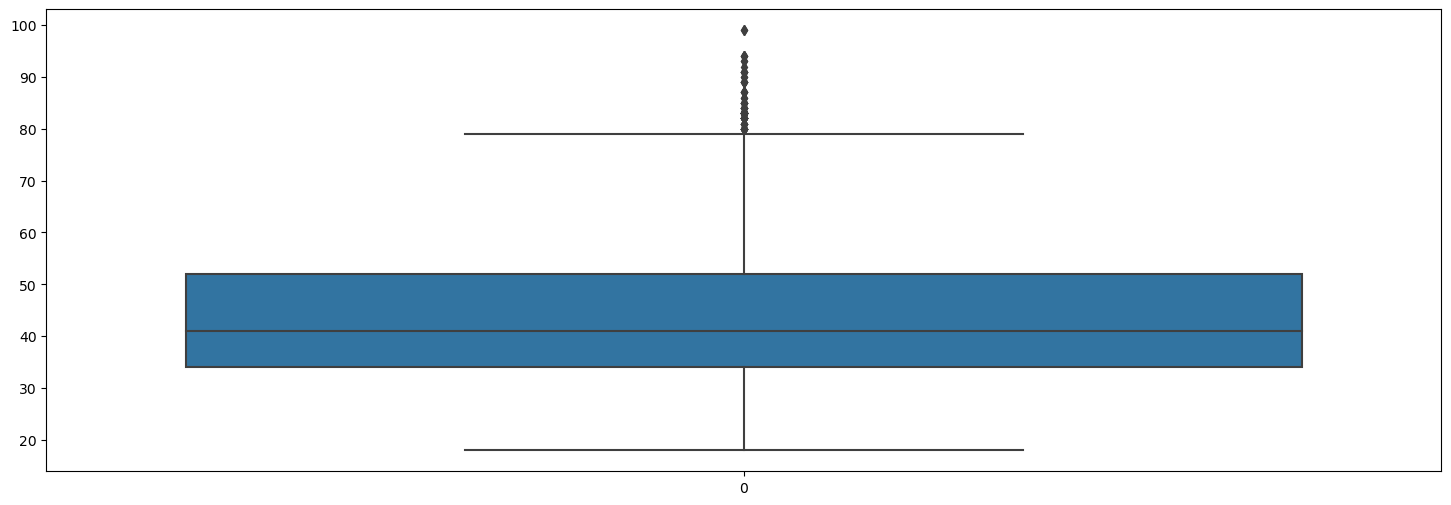

In [10]:
#SEeing teh boxplot of Age
sns.boxplot(df['Age'])
plt.show()
#As we can see, there are some outliers in Age

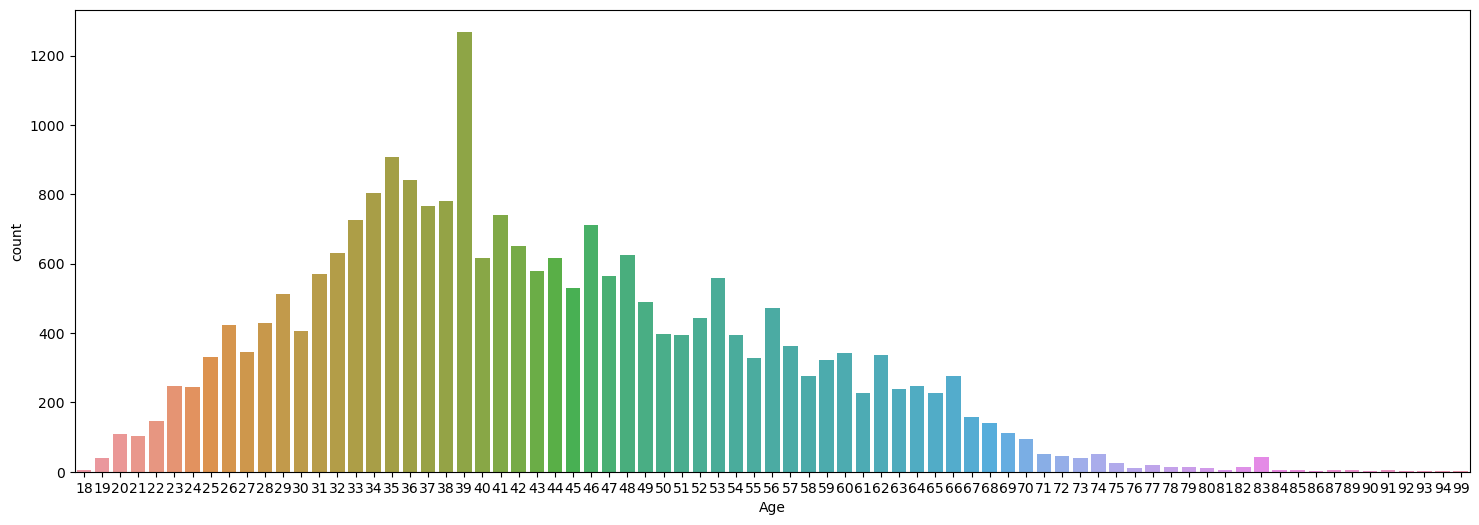

In [11]:
#Seeing the countplot of Age
sns.countplot(x=df["Age"])
plt.show()
#As we can see from the graph, people who are 39 is the highest

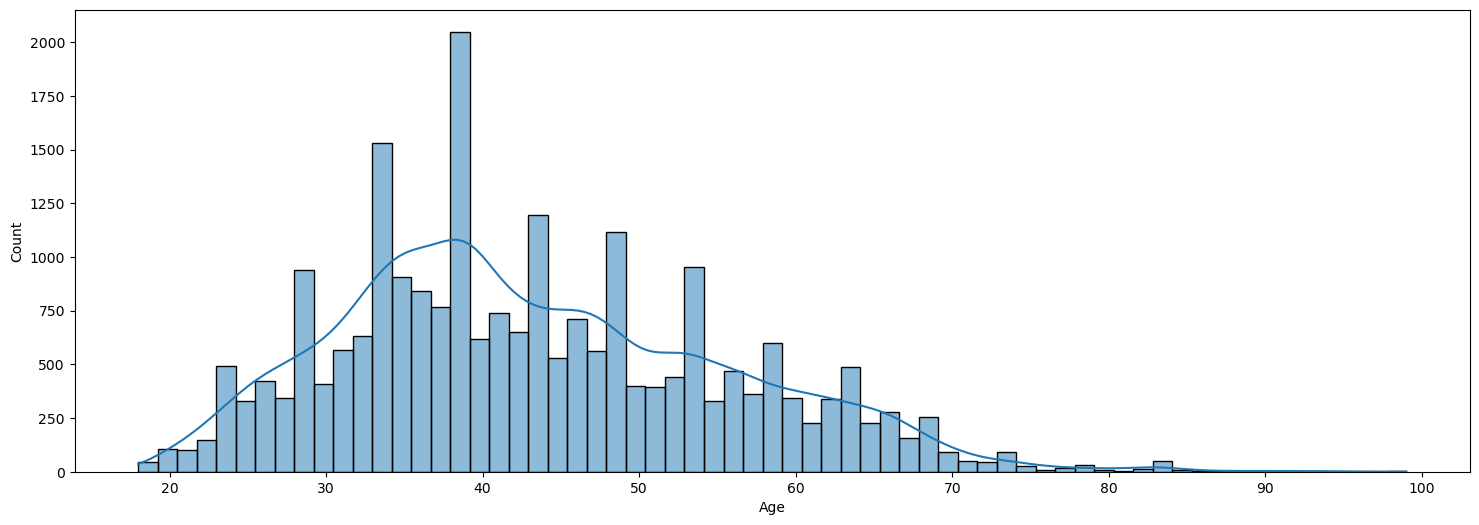

In [12]:
#Seeing the histplot of Age
sns.histplot(df["Age"], kde=True)
plt.show()

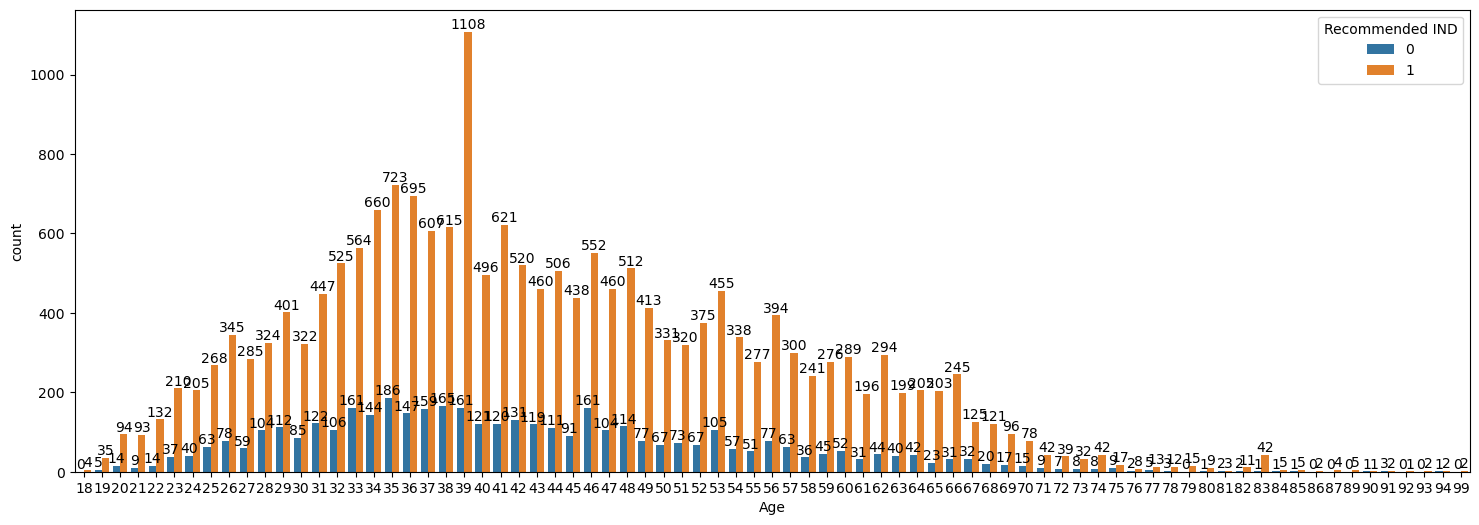

In [13]:
#Seeing the countplot of Age with the target
ax = sns.countplot(data = df, x ="Age", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

### Recommended IND (target column)

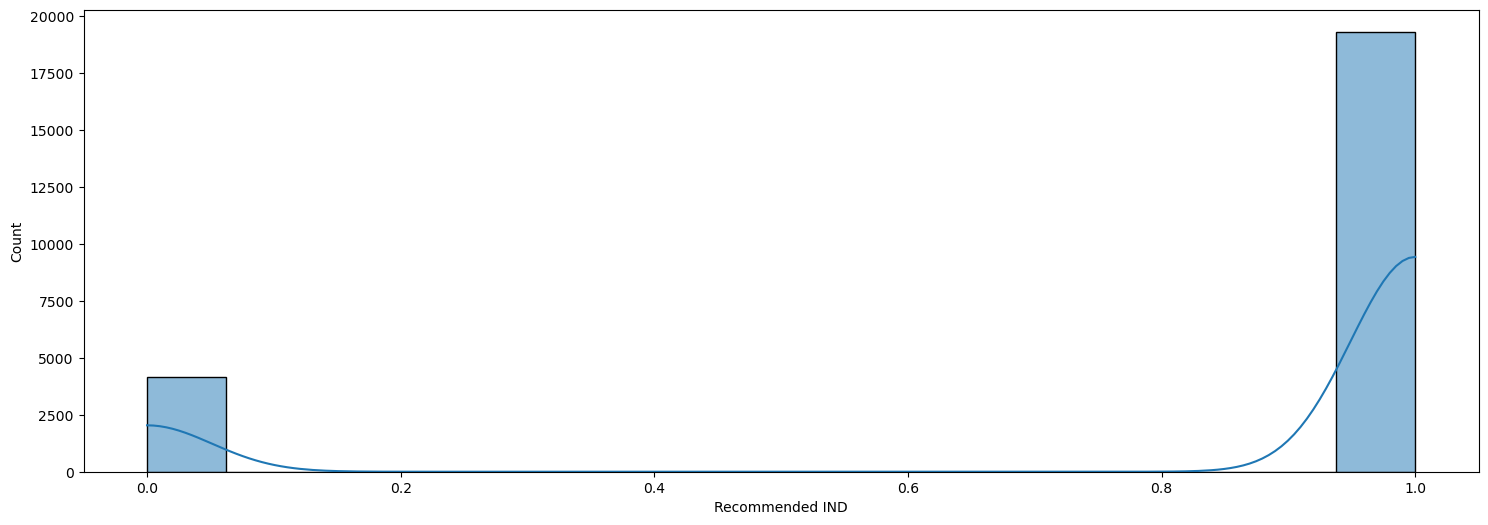

In [14]:
#Seeing the histplot of Recommended IND
sns.histplot(df["Recommended IND"], kde=True)
plt.show()

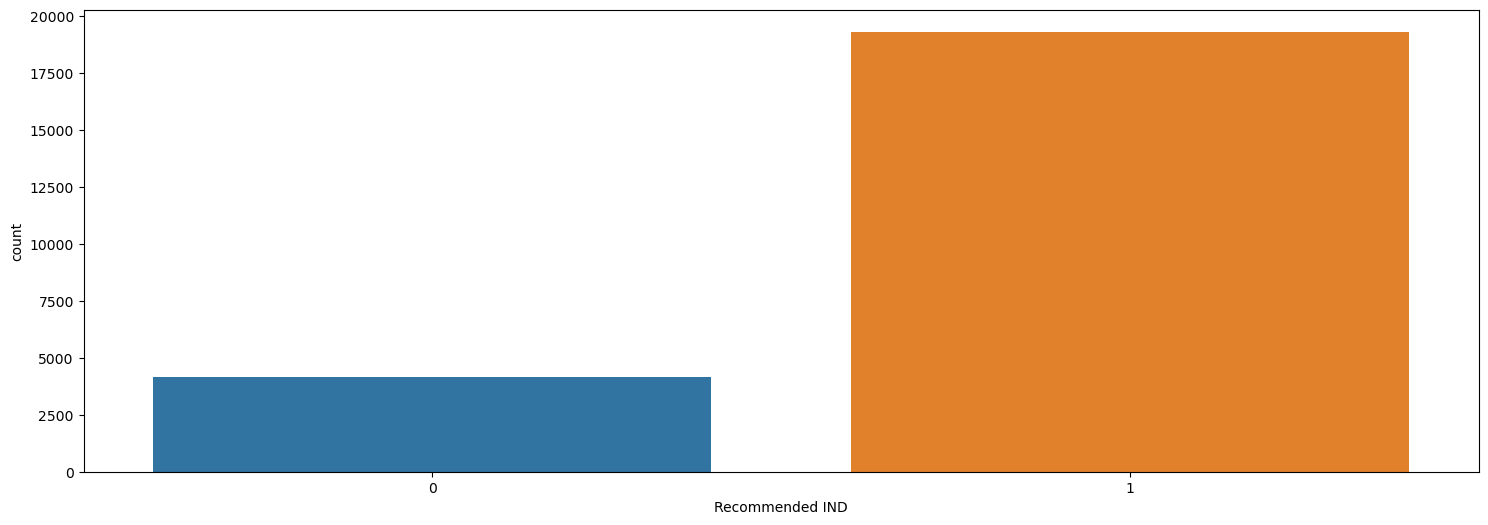

In [15]:
#Seeing the countplot of Recommended IND
sns.countplot(x=df["Recommended IND"])
plt.show()
#As we can see from the graph, There are two types one and zero

### Rating

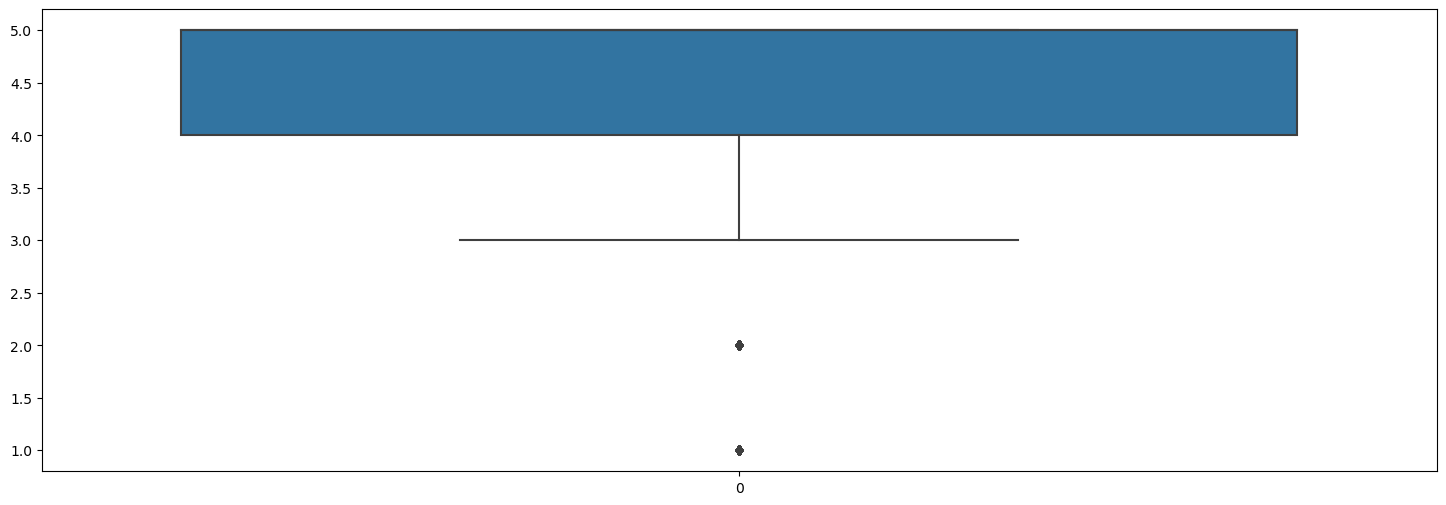

In [16]:
#SEeing teh boxplot of Rating
sns.boxplot(df['Rating'])
plt.show()
#As we can see, there are some outliers in Rating

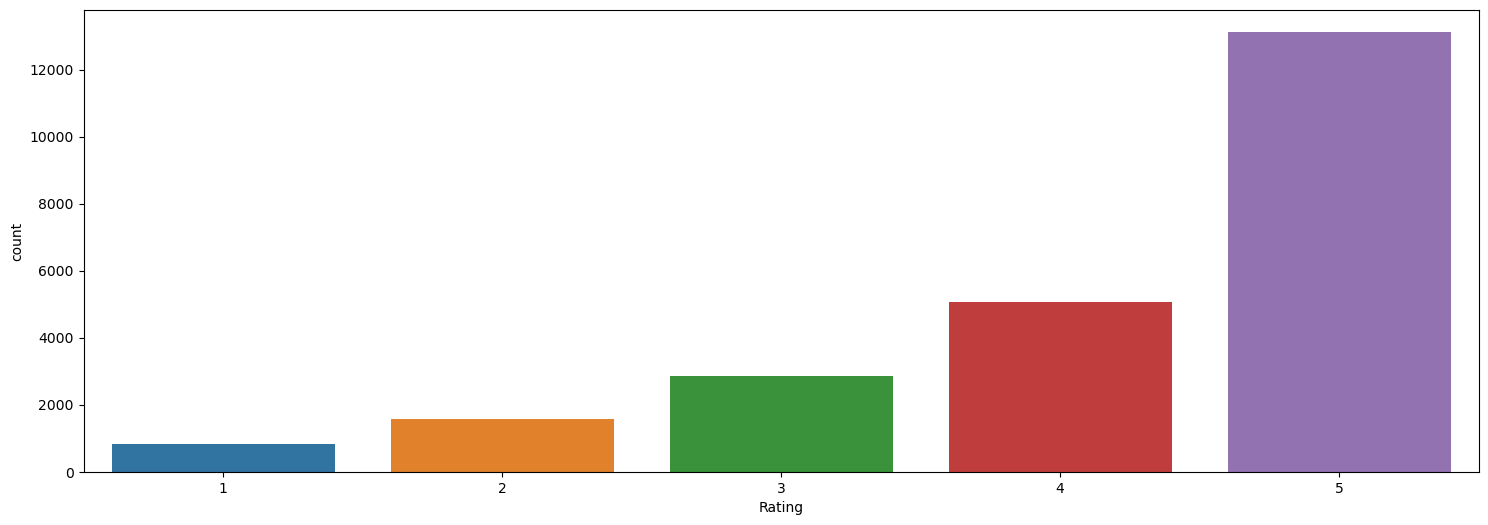

In [17]:
#Seeing the countplot of Rating
sns.countplot(x=df["Rating"])
plt.show()
#As we can see from the graph, there are three types and general is the highest

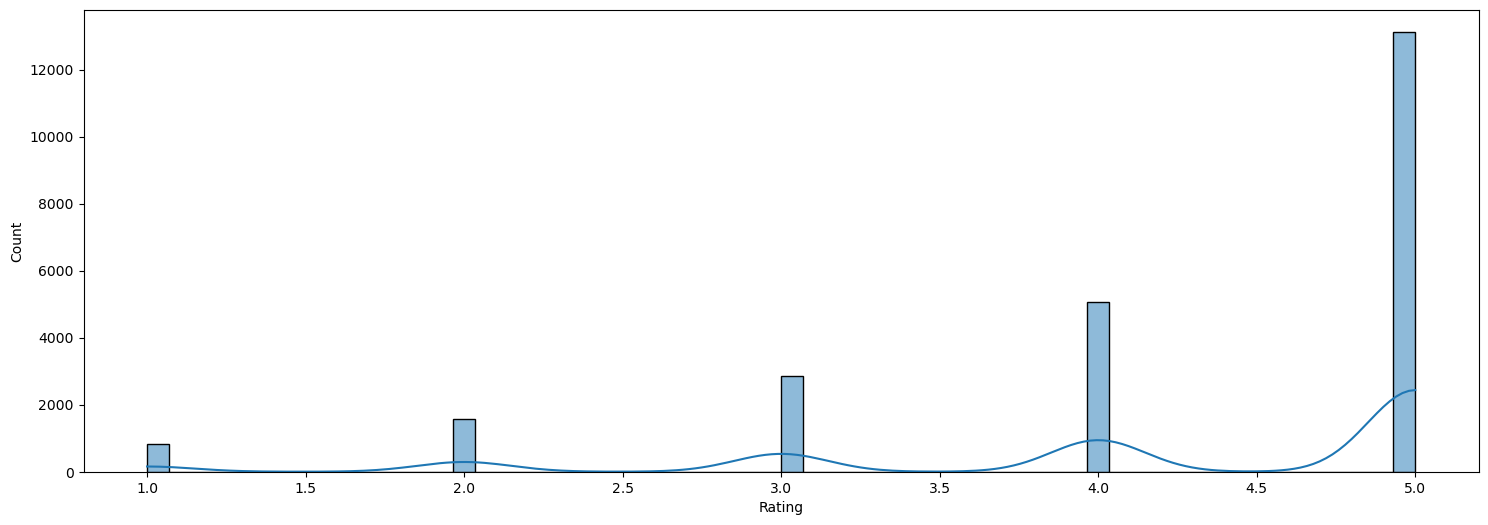

In [18]:
#Seeing the histplot of Rating
sns.histplot(df["Rating"], kde=True)
plt.show()

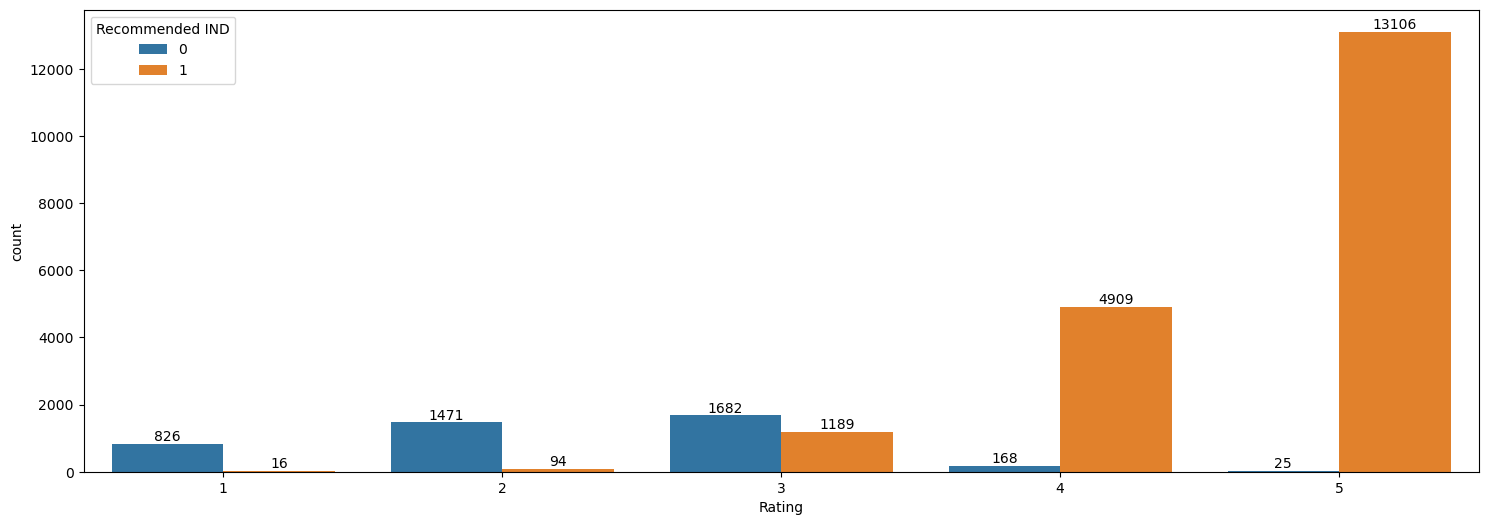

In [19]:
#Seeing the countplot of Rating with the target
ax = sns.countplot(data = df, x ="Rating", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

### Positive Feedback Count

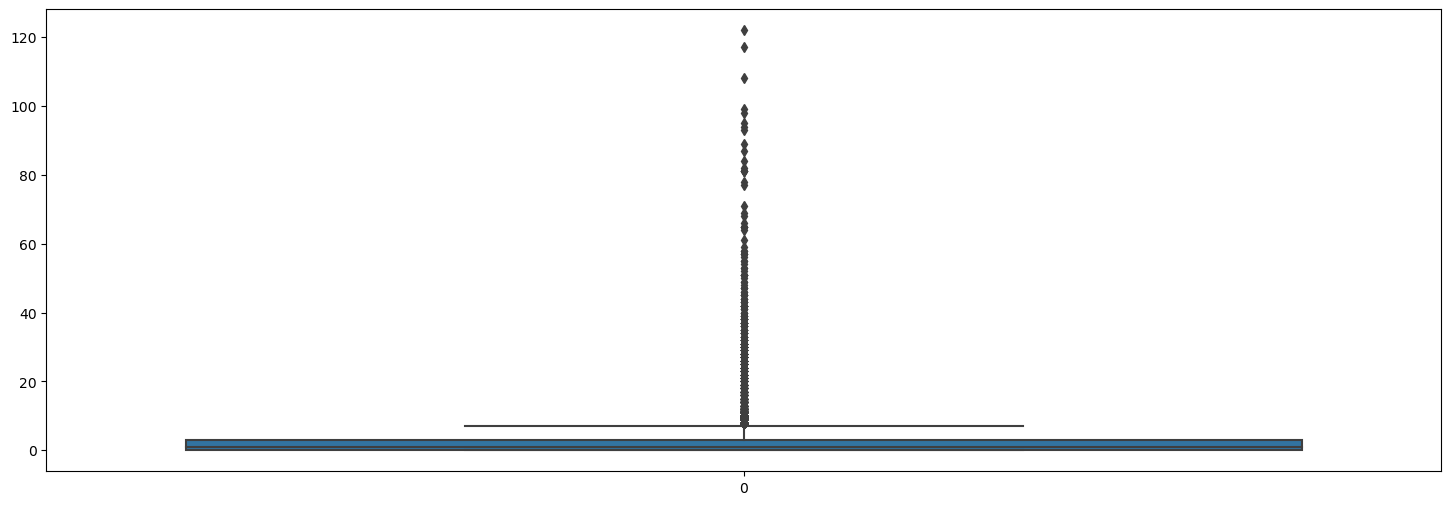

In [20]:
#SEeing teh boxplot of Positive Feedback Count
sns.boxplot(df['Positive Feedback Count'])
plt.show()
#As we can see, there are a lot outliers in Positive Feedback Count

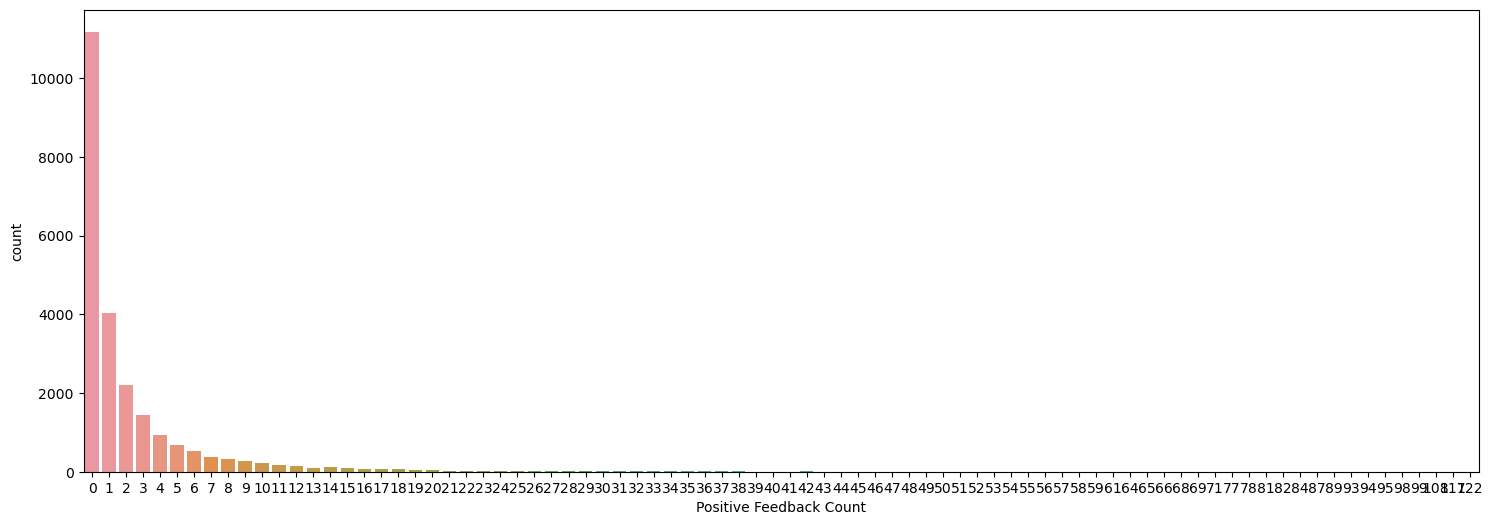

In [21]:
#Seeing the countplot of Positive Feedback Count
sns.countplot(x=df["Positive Feedback Count"])
plt.show()

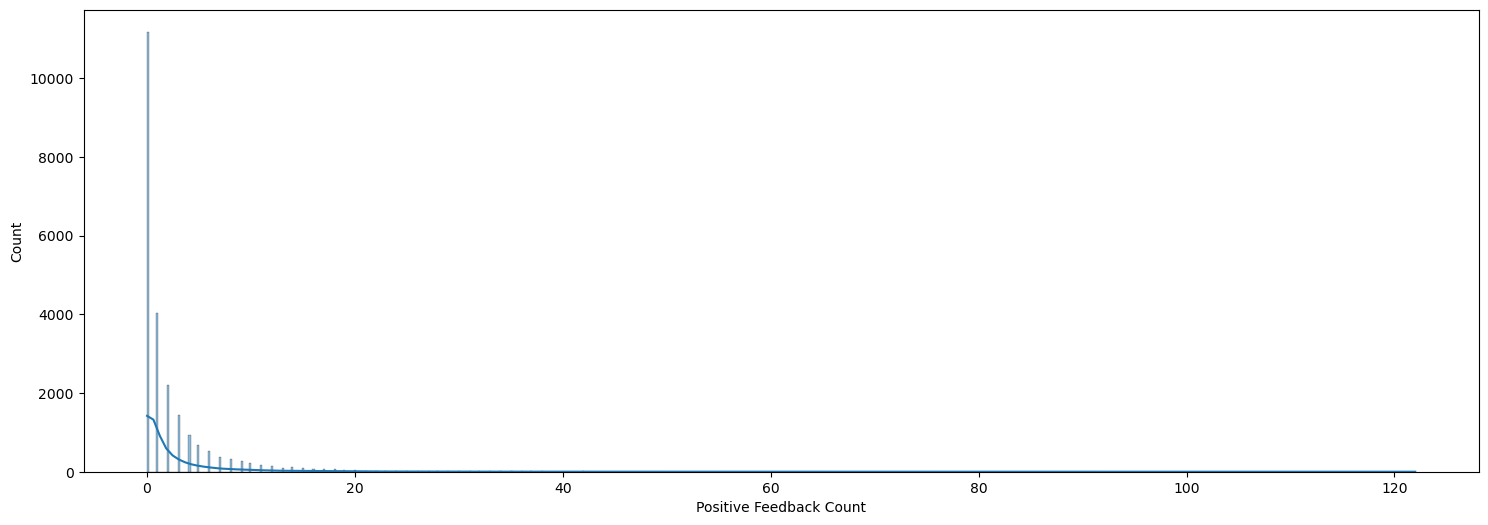

In [22]:
#Seeing the histplot of Positive Feedback Count
sns.histplot(df["Positive Feedback Count"], kde=True)
plt.show()

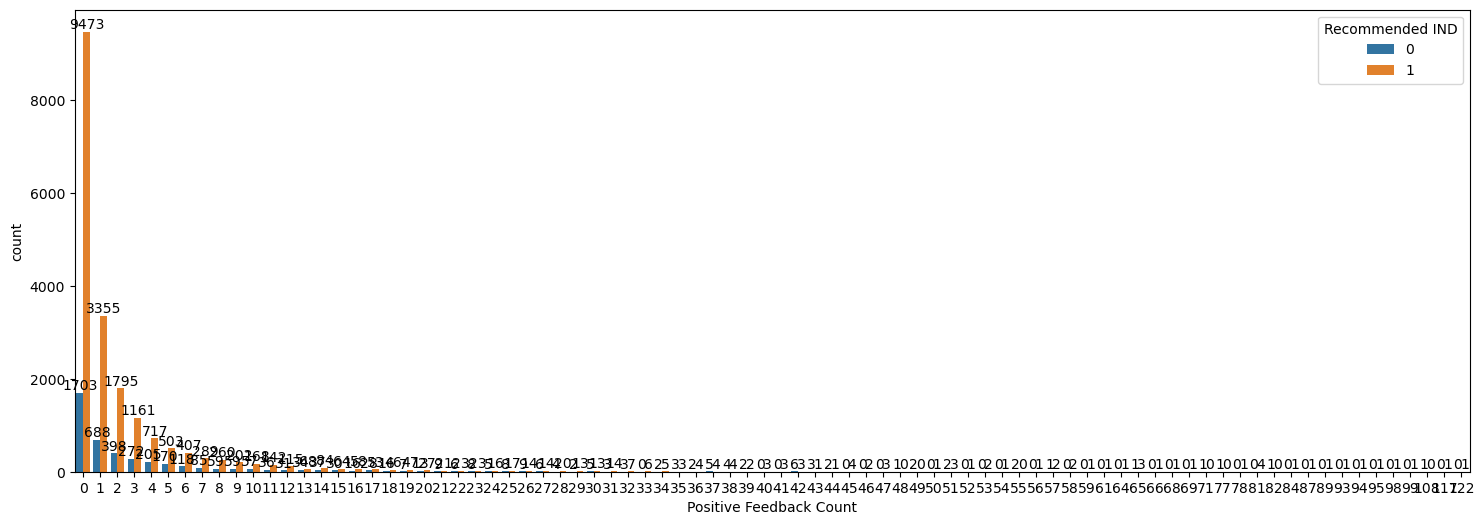

In [23]:
#Seeing the countplot of Positive Feedback Count with the target
ax = sns.countplot(data = df, x ="Positive Feedback Count", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

### Division Name

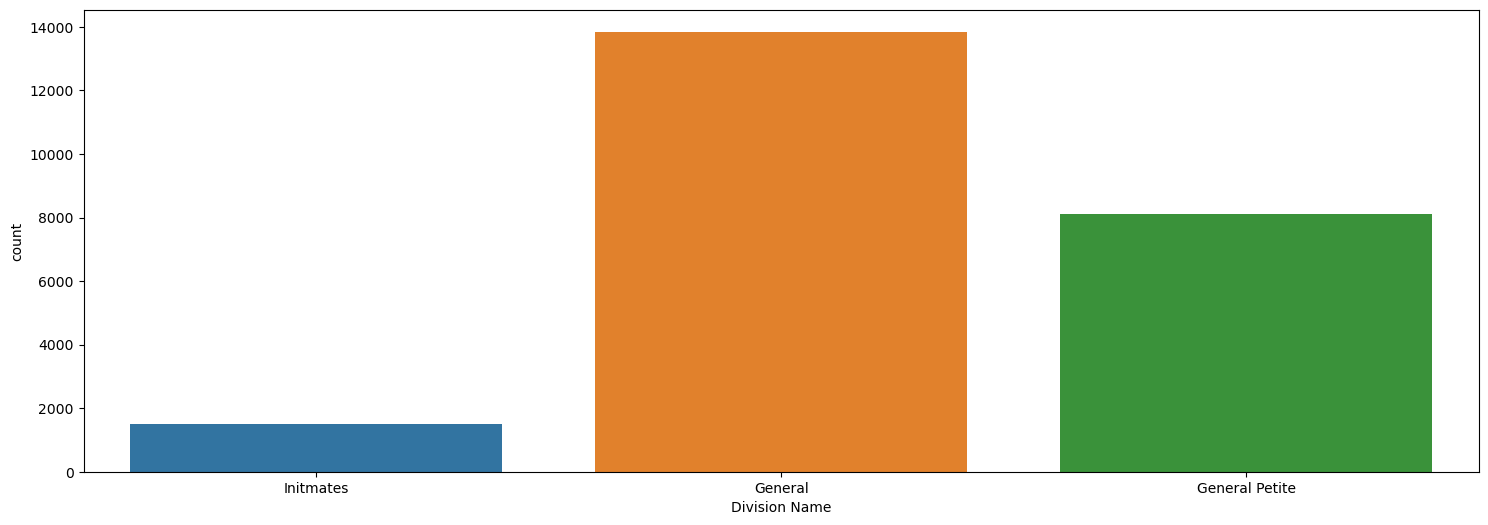

In [24]:
#Seeing the countplot of Division Name
sns.countplot(x=df["Division Name"])
plt.show()
#As we can see from the graph, there are three types and General is the highest one

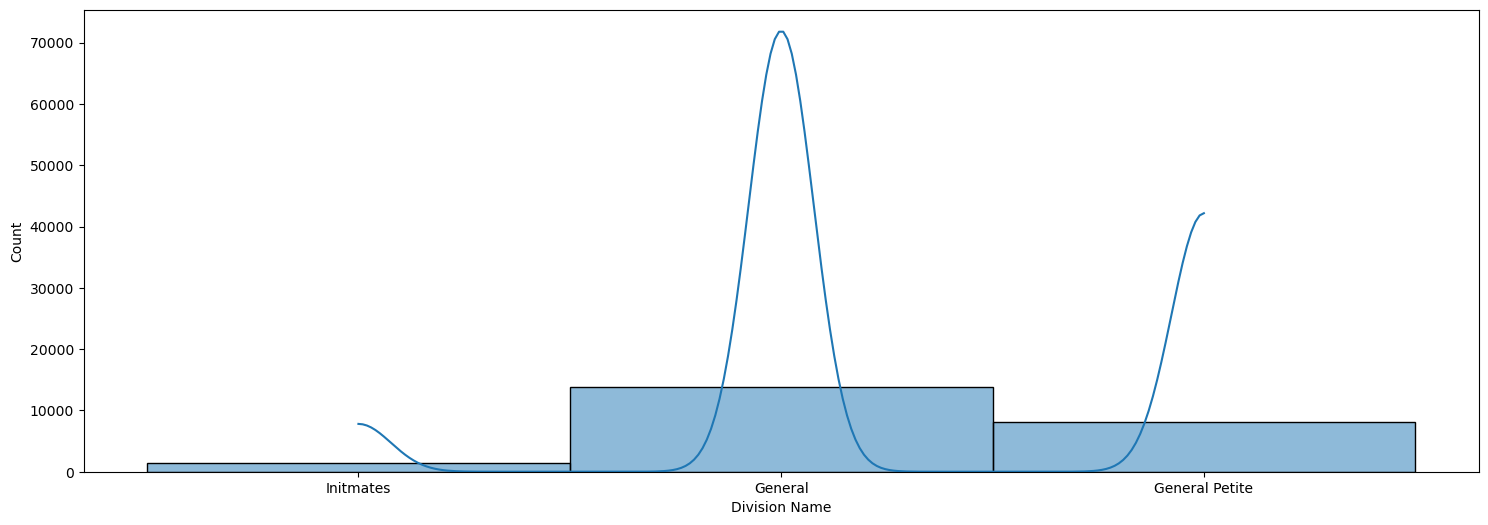

In [25]:
#Seeing the histplot of Positive Feedback Count
sns.histplot(df["Division Name"], kde=True)
plt.show()

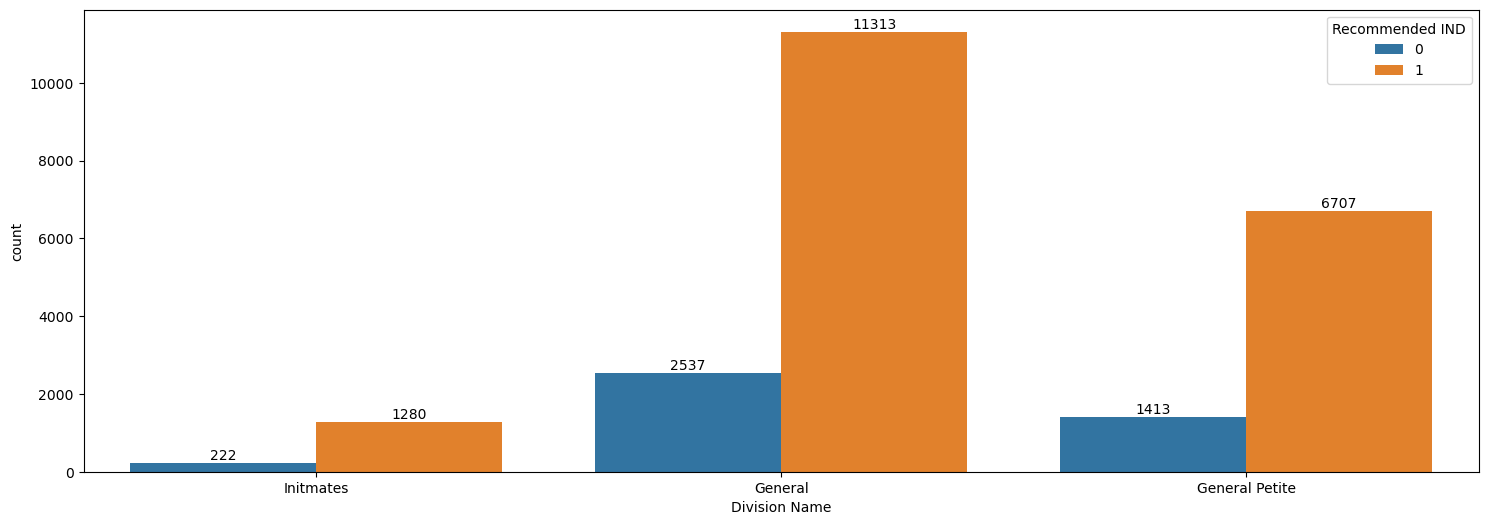

In [26]:
#Seeing the countplot of Division Name Name with the target
ax = sns.countplot(data = df, x ="Division Name", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

### Department Name

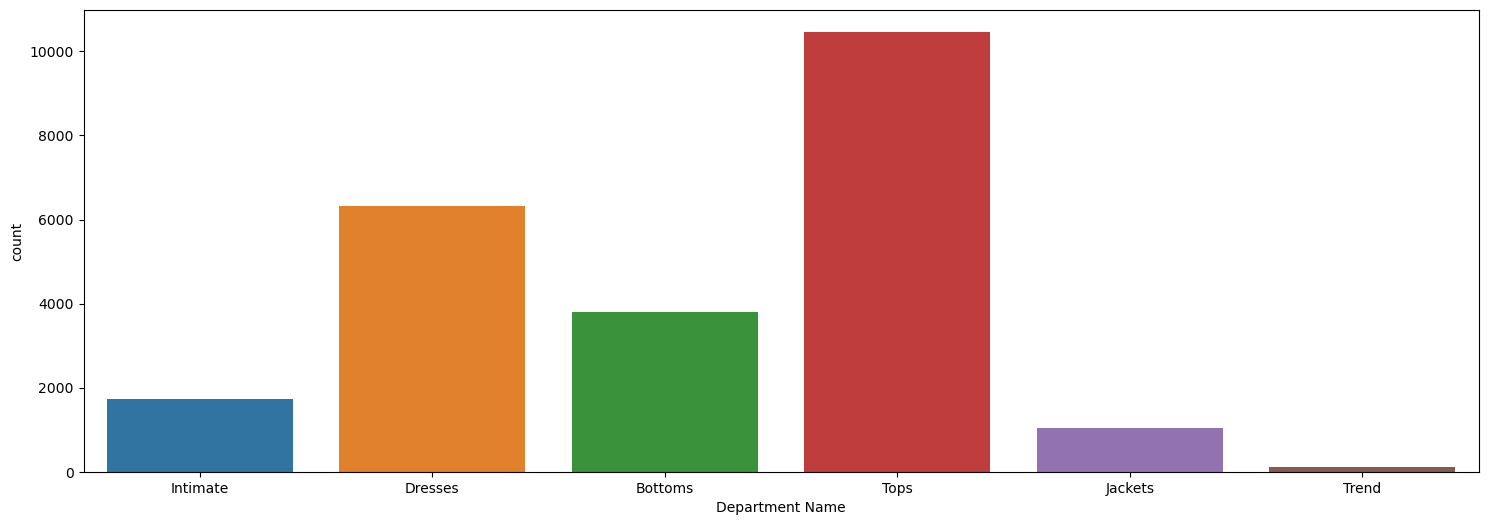

In [27]:
#Seeing the countplot of Department Name
sns.countplot(x=df["Department Name"])
plt.show()
#As we can see from the graph, there are 6 types, Tops and Dresses are the highest

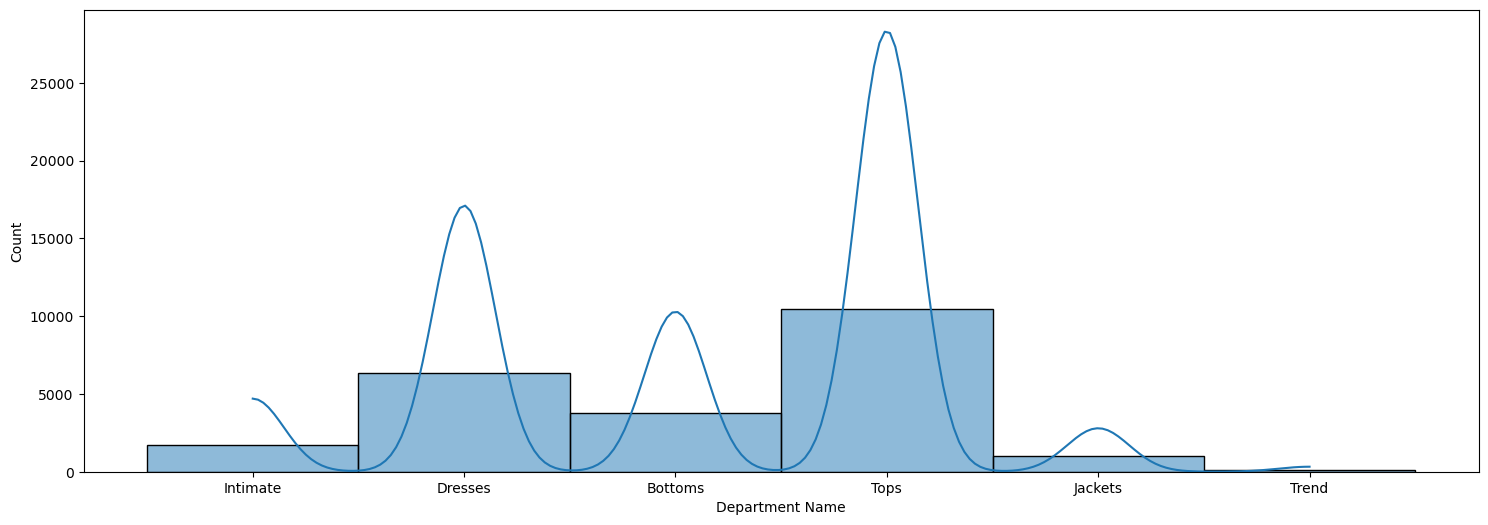

In [28]:
#Seeing the histplot of Department Name
sns.histplot(df["Department Name"], kde=True)
plt.show()

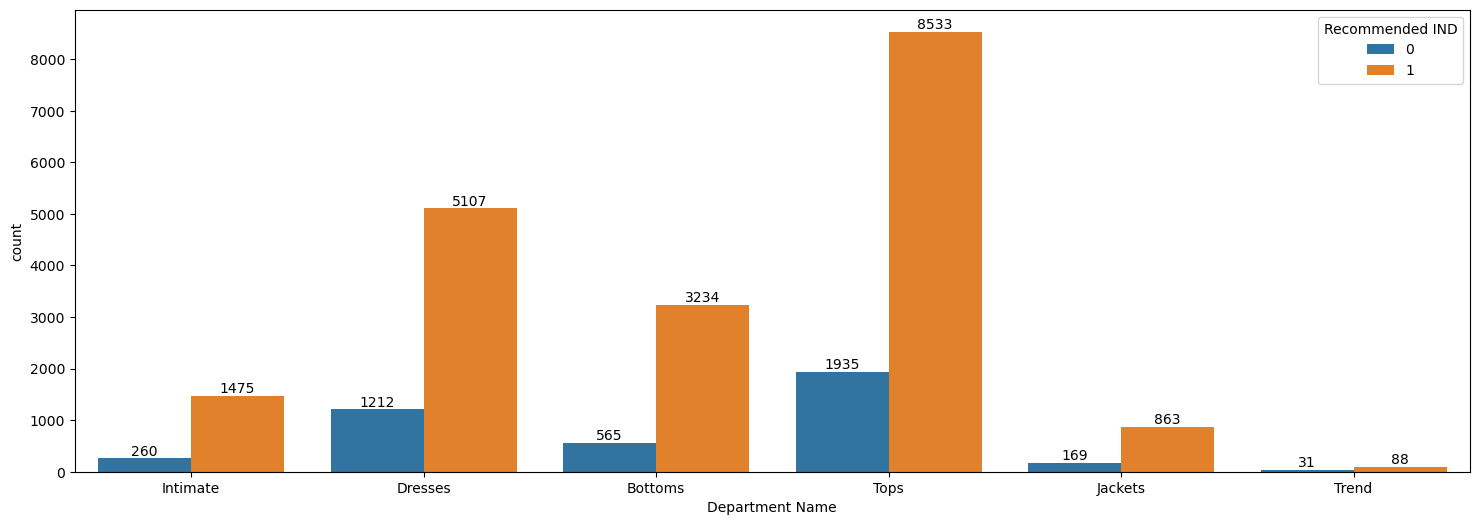

In [29]:
#Seeing the countplot of Department Name with the target
ax = sns.countplot(data = df, x ="Department Name", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

### Class Name

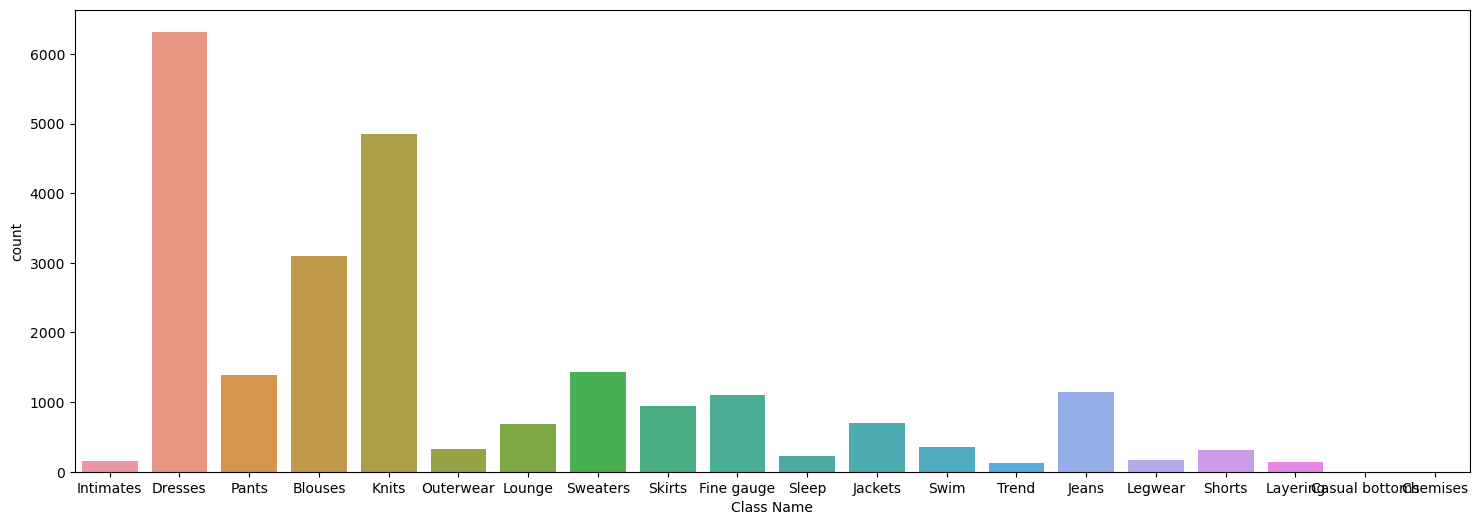

In [30]:
#Seeing the countplot of Class Name
sns.countplot(x=df["Class Name"])
plt.show()
#As we can see fromt the graph, dresses is the highest

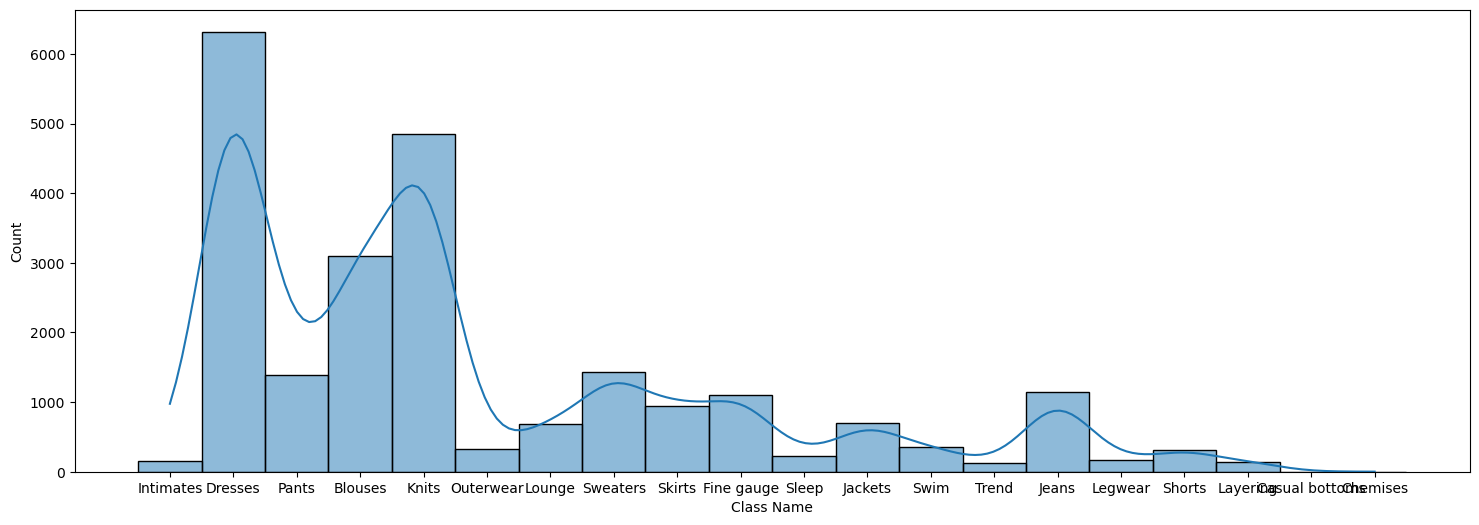

In [31]:
#Seeing the histplot of Class Name
sns.histplot(df["Class Name"], kde=True)
plt.show()

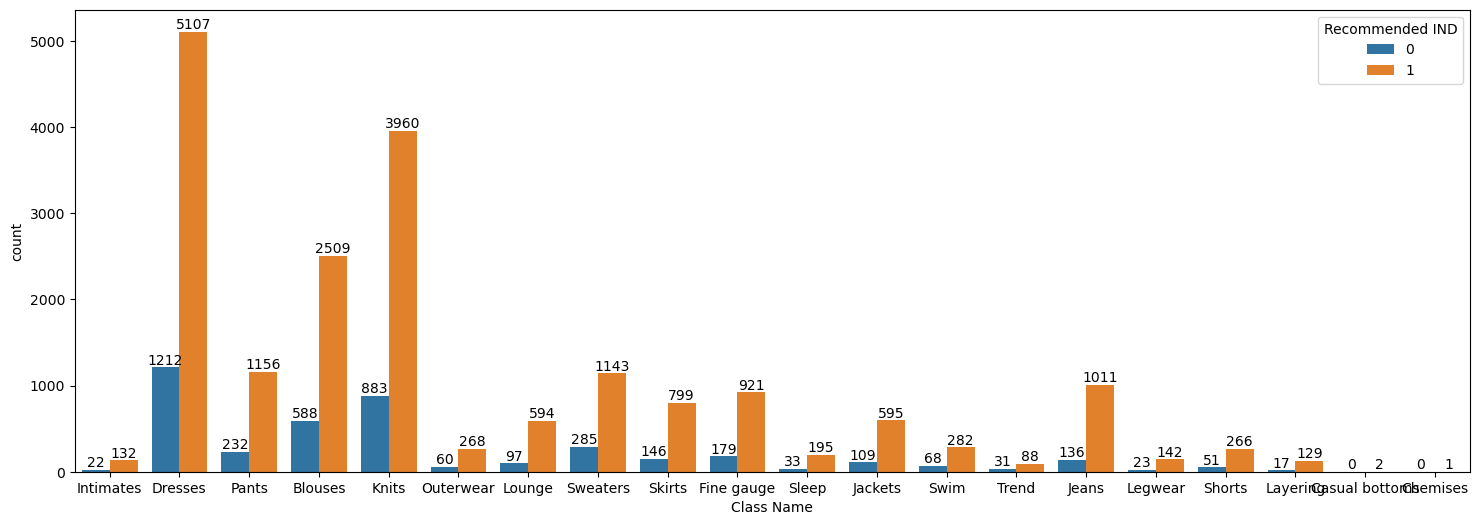

In [32]:
#Seeing the countplot of Class Name with the target
ax = sns.countplot(data = df, x ="Class Name", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

### Data Wrangling

In [33]:
#First, I am making a copy of the dataset
df2 = df.copy()

In [34]:
#Priting the head of df2
df2.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [35]:
#Seeing the columns of df2
df2.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [36]:
#Checking the values of the target
df['Recommended IND'].value_counts()
#As we can see, we have around 19314 in class 1 and about 4172 in class 0. unbalanced data

Recommended IND
1    19314
0     4172
Name: count, dtype: int64

In [37]:
#Checking the values of the target in a percenate
values = df.value_counts('Recommended IND', normalize=True)
values
#As we can see, 1 class is about 82%, and class 0 is only 17%

Recommended IND
1    0.822362
0    0.177638
Name: proportion, dtype: float64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [38]:
#Dropping the unnecessary columns of the data set
df2 = df2.drop(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Rating'
       ,'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'], axis=1)

In [39]:
#Seeing the head of df2 after dropping
df2.head()

Review Text  Recommended IND
0  Absolutely wonderful - silky and sexy and comf...                1
1  Love this dress!  it's sooo pretty.  i happene...                1
2  I had such high hopes for this dress and reall...                0
3  I love, love, love this jumpsuit. it's fun, fl...                1
4  This shirt is very flattering to all due to th...                1

In [40]:
#Renaming the target column and the feature column
df2 = df2.rename(columns={"Recommended IND": "recommend", "Review Text": "review"})
df2.head()

review  recommend
0  Absolutely wonderful - silky and sexy and comf...          1
1  Love this dress!  it's sooo pretty.  i happene...          1
2  I had such high hopes for this dress and reall...          0
3  I love, love, love this jumpsuit. it's fun, fl...          1
4  This shirt is very flattering to all due to th...          1

---
---


### Missing Value Detection

In [41]:
#Checking the null values in df2
df2.isna().sum()
#As we can see, there are null values in Review Text

review       845
recommend      0
dtype: int64

In [42]:
#Deleting the null value from Review Text
df2.dropna(inplace=True)

In [43]:
#Checking the null values in df2 after delecting
df2.isna().sum()
#As we can see, there is no null values now

review       0
recommend    0
dtype: int64

In [44]:
#Checking the duplicated data
df2.duplicated().sum()
#As we can see, there are 7 duplicated data

7

In [45]:
#Deleting the duplicated data
df2.drop_duplicates(inplace=True)

In [46]:
#Checking the duplicated data after deleting
df2.duplicated().sum()
#As we can see, there is no null data now

0

In [47]:
#Checking the values of the target
df2['recommend'].value_counts()
#As we can see, we have around 18534 in class 1 and about 4100 in class 0. unbalanced data

recommend
1    18534
0     4100
Name: count, dtype: int64

In [48]:
#Checking the values of the target in a percenate
values = df2.value_counts('recommend', normalize=True)
values
#As we can see, 1 class is about 81%, and class 0 is only 18%

recommend
1    0.818857
0    0.181143
Name: proportion, dtype: float64

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [49]:
stopWords = set(stopwords.words('english'))

exclude = {"no", "not"}

stopWords.difference_update(exclude)

In [50]:
#Creating a function for cleaning the text
def cleanText(d):

    #1- Tokenize and convert the words to lower case
    tokens = word_tokenize(d.lower())
    
    #2- Removing puncs and numbers
    punc = [w for w in tokens if w.isalpha()]
    
    #3- Removing bad characters (URLS)
    d = re.sub('http\S*', '', d).strip()
    d = re.sub('www\S*', '', d).strip()

    #4- Removing bad characters (Tags)
    d = re.sub('#\S*', '', d).strip()

    #5- Removing bad characters (Mentions)
    d = re.sub('@\S*', '', d).strip()

    #6- Removing upper brackets to keep negative auxiliary verbs in text
    d = d.replace("'", "")

    #7- Removing Stopwords
    sw = [t for t in punc if t not in stopWords]

    #8. normalization them with Lemmatization 
    cleaned = [WordNetLemmatizer().lemmatize(t) for t in sw]


    #9. joining the text with each other
    return " ".join(cleaned)

In [51]:
#Creating the cleaned dataframe with the new function
cleaned = pd.DataFrame(df2["review"].apply(cleanText))

In [52]:
#Assigning the cleaned review to df2['review'] column
df2["review"] = cleaned['review']

In [53]:
#Seeing the head of the dataset after cleaning the review column
df2.head()

review  recommend
0        absolutely wonderful silky sexy comfortable          1
1  love dress sooo pretty happened find store gla...          1
2  high hope dress really wanted work initially o...          0
3  love love love jumpsuit fun flirty fabulous ev...          1
4  shirt flattering due adjustable front tie perf...          1

In [54]:
#Seeing the review column
df2.review.head(10)

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store gla...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
5    love tracy reese dress one not petite foot tal...
6    aded basket hte last mintue see would look lik...
7    ordered carbon store pick ton stuff always try...
8    love dress usually get x run little snug bust ...
9    lb ordered petite make sure length long typica...
Name: review, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [55]:
#Creating positive and negative values of the dataset
positive = df2[df2['recommend'] == 1]['review']
negative = df2[df2['recommend'] == 0]['review']

In [56]:
#Seeing the positive texts
positive

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store gla...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
23479    sure ordering skirt could see person first gla...
23481    happy snag dress great price easy slip flatter...
23482    reminds maternity clothes soft stretchy shiny ...
23484    bought dress wedding summer cute unfortunately...
23485    dress lovely platinum feminine fit perfectly e...
Name: review, Length: 18534, dtype: object

In [57]:
#Seeing the negative text
negative

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
22       first not pullover styling side zipper would p...
25       loved material didnt really look long dress pu...
                               ...                        
23449    tried color really pretty fun want pair pant l...
23450    wanted love jacket soft great color unfortunat...
23460    purchased good price typically love maeve fabr...
23478    surprised positive review product terrible cut...
23483    fit well top see never would worked glad able ...
Name: review, Length: 4100, dtype: object

### Collect Words (positive and negative separately)

In [58]:
#Joining the positive and negative texts
text_pos = " ".join(positive)
text_neg = " ".join(negative)

In [59]:
#Seeing the positive text
text_pos

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long go petite also bit loose no xx kept wil ldecide later since light color already sold hte

In [60]:
#Seeing the negative text
text_neg

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first not pullover styling side zipper would purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath not look like described sadly returning sure find so

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [61]:
#Creating WorldCloud for positive words
positive_worldCloud = WordCloud(background_color="black", max_words =250)

In [62]:
#Generation the worldCloud for positive words
positive_worldCloud.generate(text_pos)

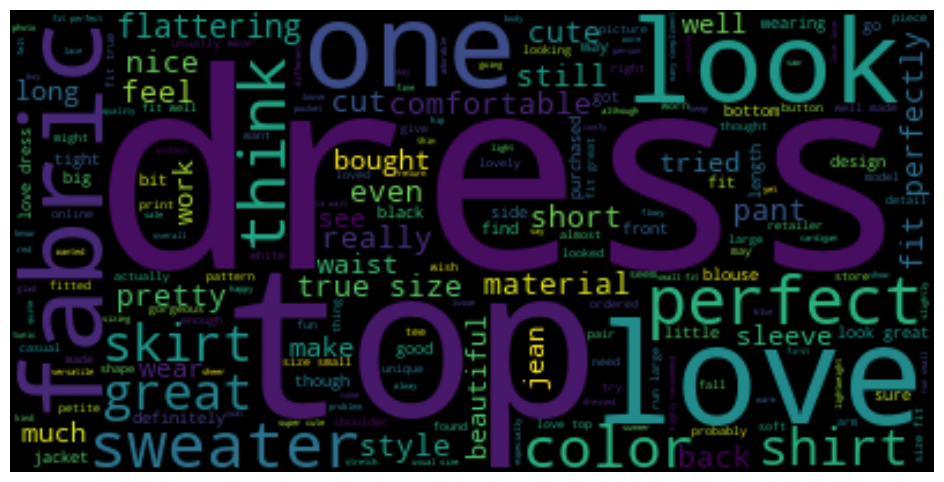

In [63]:
#Ploting the worldCloud of positive words
plt.imshow(positive_worldCloud, interpolation="bilinear")
plt.axis("off")
plt.show()
#As we can see from the figure, dress, top, love, look, perfect, fabric,... are the common words in the positve part

In [64]:
#Creating WorldCloud for negative words
negative_worldCloud = WordCloud(background_color="black", max_words =250)

In [65]:
#Generation the worldCloud for negative words
negative_worldCloud.generate(text_neg)

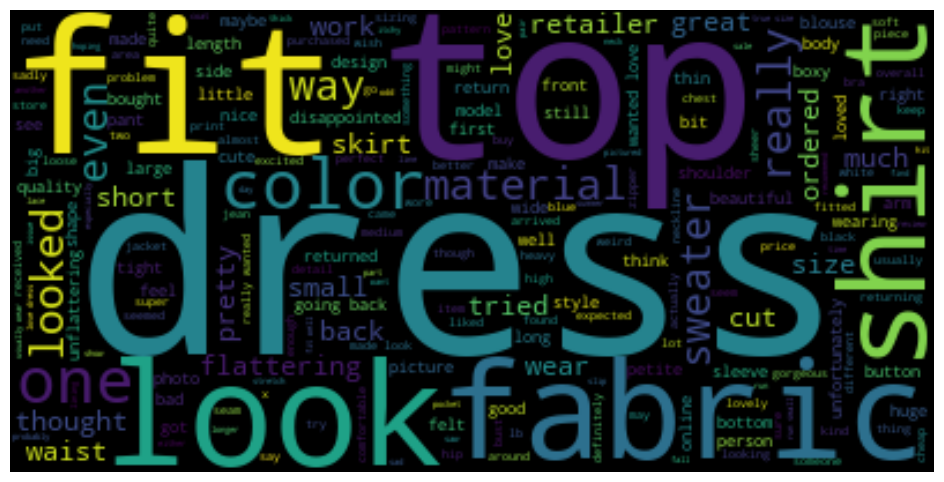

In [66]:
#Ploting the worldCloud of negative words
plt.imshow(negative_worldCloud, interpolation="bilinear")
plt.axis("off")
plt.show()
#As we can see from the figure, dress, top, fit, look, fabric,... are also in the negative part as well.

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [67]:
#Seeing the columns of the dataset
df2.columns

Index(['review', 'recommend'], dtype='object')

In [68]:
#Seed value
s = 101

In [69]:
#Splitting the dataset to X and y
X = df2["review"] #Feature
y = df2["recommend"] #Target

In [70]:
#Seeing the X
X

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store gla...
2        high hope dress really wanted work initially o...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
                               ...                        
23481    happy snag dress great price easy slip flatter...
23482    reminds maternity clothes soft stretchy shiny ...
23483    fit well top see never would worked glad able ...
23484    bought dress wedding summer cute unfortunately...
23485    dress lovely platinum feminine fit perfectly e...
Name: review, Length: 22634, dtype: object

In [71]:
#Seeing the y
y

0        1
1        1
2        0
3        1
4        1
        ..
23481    1
23482    1
23483    0
23484    1
23485    1
Name: recommend, Length: 22634, dtype: int64

In [72]:
#Spliting the X and y to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=s)

In [73]:
#Seeing the shape of X_train, and X_test
print('The shape of X_train: ', X_train.shape)
print('The shape of X_test: ', X_test.shape)

The shape of X_train:  (18107,)
The shape of X_test:  (4527,)


In [74]:
#Seeing the shape of y_train, and y_test
print('The shape of y_train: ', y_train.shape)
print('The shape of y_test: ', y_test.shape)

The shape of y_train:  (18107,)
The shape of y_test:  (4527,)


In [75]:
#Seeing X_train
X_train

10450    bought shirt wanted love could ordered x huge ...
17559    found dress run true size lb x fit great perfe...
1443     thrilled not fit great got deep sale price pro...
7804     really cute skirt love hidden pocket front end...
1224     like reviewer hesitant spend much pair jean ho...
                               ...                        
17396    love top comfortable wear alone sweater black ...
21884    buy many jacket retired think still useful dou...
13184    concerned purchasing dress read two slender pe...
10314    wanted dress made feel pretty traveling went e...
5365     love dress dressed dresser occasion order peti...
Name: review, Length: 18107, dtype: object

In [76]:
#Seeing X_test
X_test

9416     shift dress great dress many people kind way s...
19236    cozy sweater feel cashmere fit loose similar l...
3130     ordered shirt color different size petite regu...
10517    saw dress catalog went store sold order ship t...
4726     agree another reviewer neckline right not low ...
                               ...                        
23386    charming dress fit perfectly great movement ba...
15412    bought dress store love every thing need dress...
5729     appeared line thought would sure thing color b...
5597     walked store tee instantly caught eye light we...
8662     great vest wear time soft pretty warm durable ...
Name: review, Length: 4527, dtype: object

In [77]:
#Seeing y_train
y_train

10450    0
17559    1
1443     1
7804     1
1224     1
        ..
17396    1
21884    1
13184    1
10314    1
5365     1
Name: recommend, Length: 18107, dtype: int64

In [78]:
#Seeing y_test
y_test

9416     0
19236    1
3130     1
10517    1
4726     1
        ..
23386    1
15412    1
5729     1
5597     1
8662     1
Name: recommend, Length: 4527, dtype: int64

In [79]:
#Splitting the training data to validation data
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
#                                                       test_size=0.2, 
#                                                       stratify=y_train, 
#                                                       random_state=s, 
#                                                       shuffle=True)

In [80]:
#Seeing the shape of y_valid, and y_valid
# print('The shape of y_val: ', y_valid.shape)
# print('The shape of y_val: ', X_valid.shape)

In [81]:
#Seeing X_valid
# X_valid

In [82]:
#Seeing y_valid
# y_valid

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [83]:
#Creating count vectorization 
vec = CountVectorizer(preprocessor = cleanText, min_df=3)
X_train_c = vec.fit_transform(X_train)
X_test_c = vec.transform(X_test)

In [84]:
#Converting X_train_c to array
count = X_train_c.toarray()

In [85]:
cou_fea = vec.get_feature_names_out()

In [86]:
#Creating a dataframe from the array
pd.DataFrame(count, columns = cou_fea)

aa  abby  abdomen  ability  able  abo  absolute  absolutely  abstract  \
0       0     0        0        0     0    0         0           0         0   
1       0     0        0        0     0    0         0           0         0   
2       0     0        0        0     0    0         0           0         0   
3       0     0        0        0     0    0         0           0         0   
4       0     0        0        0     0    0         0           0         0   
...    ..   ...      ...      ...   ...  ...       ...         ...       ...   
18102   0     0        0        0     0    0         0           0         0   
18103   0     0        0        0     0    0         0           0         0   
18104   0     0        0        0     0    0         0           0         0   
18105   0     0        0        0     0    0         0           0         0   
18106   0     0        0        0     0    0         0           0         0   

       absurd  abt  abundance  ac  accent  accentuate  accentuated  \
0           0    0          0   0       0           0            0   
1           0    0          0   0       0           0            0   
2           0    0          0   0       0           0            0   
3           0    0          0   0       0           0            0   
4           0    0          0   0       0           0            0   
...       ...  ...        ...  ..     ...         ...          ...   
18102       0    0          0   0       0           0            0   
18103       0    0          0   0       0           0            0   
18104       0    0          0   0       0           0            0   
18105       0    0          0   0       0           0            0   
18106       0    0          0   0       0           0            0   

       accentuates  accentuating  acceptable  access  accessorize  \
0                0             0           0       0            0   
1                0             0           0       0            0   
2                0             0           0       0            0   
3                0             0           0       0            0   
4                0             0           0       0            0   
...            ...           ...         ...     ...          ...   
18102            0             0           0       0            0   
18103            0             0           0       0            0   
18104            0             0           0       0            0   
18105            0             0           0       0            0   
18106            0             0           0       0            0   

       accessorized  accessory  accident  accidental  ...  year  yellow  yep  \
0                 0          0         0           0  ...     0       0    0   
1                 0          0         0           0  ...     0       0    0   
2                 0          0         0           0  ...     0       0    0   
3                 0          0         0           0  ...     0       0    0   
4                 0          0         0           0  ...     0       0    0   
...             ...        ...       ...         ...  ...   ...     ...  ...   
18102             0          0         0           0  ...     0       0    0   
18103             0          0         0           0  ...     0       0    0   
18104             0          0         0           0  ...     0       0    0   
18105             0          0         0           0  ...     0       0    0   
18106             0          0         0           0  ...     0       0    0   

       yes  yesterday  yet  yikes  yo  yoga  yoke  young  younger  youre  \
0        0          0    0      0   0     0     0      0        0      0   
1        0          0    0      0   0     0     0      0        0      0   
2        0          0    0      0   0     0     0      0        0      0   
3        0          0    0      0   0     0     0      0        0      0   
4        0          0    0      0  

### TF-IDF

In [87]:
tf_vec = TfidfVectorizer(preprocessor=cleanText, min_df=3)
X_train_tf = tf_vec.fit_transform(X_train)
X_test_tf = tf_vec.transform(X_test)

In [88]:
tf = X_train_tf.toarray()

In [89]:
tf_fea = tf_vec.get_feature_names_out()

In [90]:
pd.DataFrame(tf, columns = tf_fea)

aa  abby  abdomen  ability  able  abo  absolute  absolutely  abstract  \
0      0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0       0.0   
1      0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0       0.0   
2      0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0       0.0   
3      0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0       0.0   
4      0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0       0.0   
...    ...   ...      ...      ...   ...  ...       ...         ...       ...   
18102  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0       0.0   
18103  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0       0.0   
18104  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0       0.0   
18105  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0       0.0   
18106  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0       0.0   

       absurd  abt  abundance   ac  accent  accentuate  accentuated  \
0         0.0  0.0        0.0  0.0     0.0         0.0          0.0   
1         0.0  0.0        0.0  0.0     0.0         0.0          0.0   
2         0.0  0.0        0.0  0.0     0.0         0.0          0.0   
3         0.0  0.0        0.0  0.0     0.0         0.0          0.0   
4         0.0  0.0        0.0  0.0     0.0         0.0          0.0   
...       ...  ...        ...  ...     ...         ...          ...   
18102     0.0  0.0        0.0  0.0     0.0         0.0          0.0   
18103     0.0  0.0        0.0  0.0     0.0         0.0          0.0   
18104     0.0  0.0        0.0  0.0     0.0         0.0          0.0   
18105     0.0  0.0        0.0  0.0     0.0         0.0          0.0   
18106     0.0  0.0        0.0  0.0     0.0         0.0          0.0   

       accentuates  accentuating  acceptable  access  accessorize  \
0              0.0           0.0         0.0     0.0          0.0   
1              0.0           0.0         0.0     0.0          0.0   
2              0.0           0.0         0.0     0.0          0.0   
3              0.0           0.0         0.0     0.0          0.0   
4              0.0           0.0         0.0     0.0          0.0   
...            ...           ...         ...     ...          ...   
18102          0.0           0.0         0.0     0.0          0.0   
18103          0.0           0.0         0.0     0.0          0.0   
18104          0.0           0.0         0.0     0.0          0.0   
18105          0.0           0.0         0.0     0.0          0.0   
18106          0.0           0.0         0.0     0.0          0.0   

       accessorized  accessory  accident  accidental  ...  year  yellow  yep  \
0               0.0        0.0       0.0         0.0  ...   0.0     0.0  0.0   
1               0.0        0.0       0.0         0.0  ...   0.0     0.0  0.0   
2               0.0        0.0       0.0         0.0  ...   0.0     0.0  0.0   
3               0.0        0.0       0.0         0.0  ...   0.0     0.0  0.0   
4               0.0        0.0       0.0         0.0  ...   0.0     0.0  0.0   
...             ...        ...       ...         ...  ...   ...     ...  ...   
18102           0.0        0.0       0.0         0.0  ...   0.0     0.0  0.0   
18103           0.0        0.0       0.0         0.0  ...   0.0     0.0  0.0   
18104           0.0        0.0       0.0         0.0  ...   0.0     0.0  0.0   
18105           0.0        0.0       0.0         0.0  ...   0.0     0.0  0.0   
18106           0.0        0.0       0.0         0.0  ...   0.0     0.0  0.0   

       yes  yesterday  yet  yikes   yo  yoga  yoke  young  younger  youre  \
0      0.0        0.0  0.0    0.0  0.0   0.0   0.0    0.0      0.0    0.0   
1      0.0        0.0  0.0    0.0  0.0   0.0   0.0    0.0      0.0    0.0   
2      0.0        0.0  0.0    0.0  0.0   0.0   0.0    0.0      0.0    0.0   
3      0.0        0.0  0.0    0.0  0.0   0.0   0.0    0.0      0.0    0.0   
4      

### Eval Function

In [91]:
#Creating eval function for classification report and confusion matrix
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [92]:
#Creating scoring
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=[0]),
            'recall-neg': make_scorer(recall_score, average=None, labels = [0]),
            'f1-neg': make_scorer(f1_score, average=None, labels = [0])}

In [93]:
log_model = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
log_model.fit(X_train_c,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [94]:
print("Logistic MODEL")
eval(log_model, X_train_c, X_test_c)
#As we can see, there is no overfitting

Logistic MODEL
[[ 713  107]
 [ 557 3150]]
Test_Set
              precision    recall  f1-score   support

           0       0.56      0.87      0.68       820
           1       0.97      0.85      0.90      3707

    accuracy                           0.85      4527
   macro avg       0.76      0.86      0.79      4527
weighted avg       0.89      0.85      0.86      4527

Train_Set
              precision    recall  f1-score   support

           0       0.60      0.90      0.72      3280
           1       0.97      0.87      0.92     14827

    accuracy                           0.87     18107
   macro avg       0.79      0.88      0.82     18107
weighted avg       0.91      0.87      0.88     18107



In [97]:
#Predicting the X_test
y_pred = log_model.predict(X_test_c)

In [95]:
model_log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
scores = cross_validate(model_log, X_train_c, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.853593
train_accuracy         0.871959
test_precision-neg     0.564614
train_precision-neg    0.597753
test_recall-neg        0.842683
train_recall-neg       0.896375
test_f1-neg            0.675984
train_f1-neg           0.717220
dtype: float64

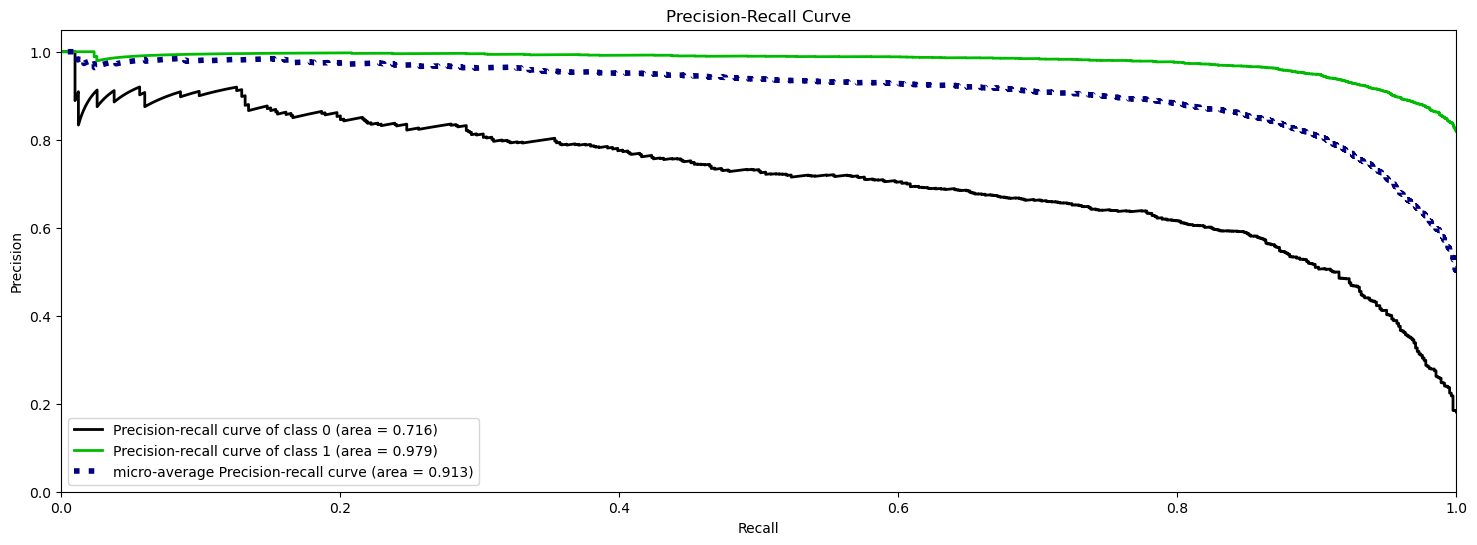

In [96]:
# Creating the plot of precision recall

model = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')

model.fit(X_train_c, y_train)

y_pred_proba = model.predict_proba(X_test_c)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [99]:
y_test_dummies = pd.get_dummies(y_test)
log_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
log_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
log_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

In [102]:
log_count_rec_neg, log_count_f1_neg, log_AP_neg 

(array([0.8695122]), array([0.68229665]), 0.7164101604447622)

### TF-IDF

In [103]:
log_tf = LogisticRegression(C=0.4, max_iter=1000, class_weight='balanced')
log_tf.fit(X_train_tf, y_train)

LogisticRegression(C=0.4, class_weight='balanced', max_iter=1000)

In [104]:
#Printing the eval function
print("Logistic MODEL")
eval(log_tf, X_train_tf, X_test_tf)
#AS we can see, there is no overfitting

Logistic MODEL
[[ 724   96]
 [ 539 3168]]
Test_Set
              precision    recall  f1-score   support

           0       0.57      0.88      0.70       820
           1       0.97      0.85      0.91      3707

    accuracy                           0.86      4527
   macro avg       0.77      0.87      0.80      4527
weighted avg       0.90      0.86      0.87      4527

Train_Set
              precision    recall  f1-score   support

           0       0.61      0.91      0.73      3280
           1       0.98      0.87      0.92     14827

    accuracy                           0.88     18107
   macro avg       0.79      0.89      0.83     18107
weighted avg       0.91      0.88      0.89     18107



In [108]:
#Predicting the X_test
y_pred = log_tf.predict(X_test_c)
y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [105]:
model = LogisticRegression(C=0.4, max_iter=1000, class_weight='balanced')
scores = cross_validate(model, X_train_tf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.859447
train_accuracy         0.878936
test_precision-neg     0.575717
train_precision-neg    0.610768
test_recall-neg        0.855793
train_recall-neg       0.914465
test_f1-neg            0.688171
train_f1-neg           0.732379
dtype: float64

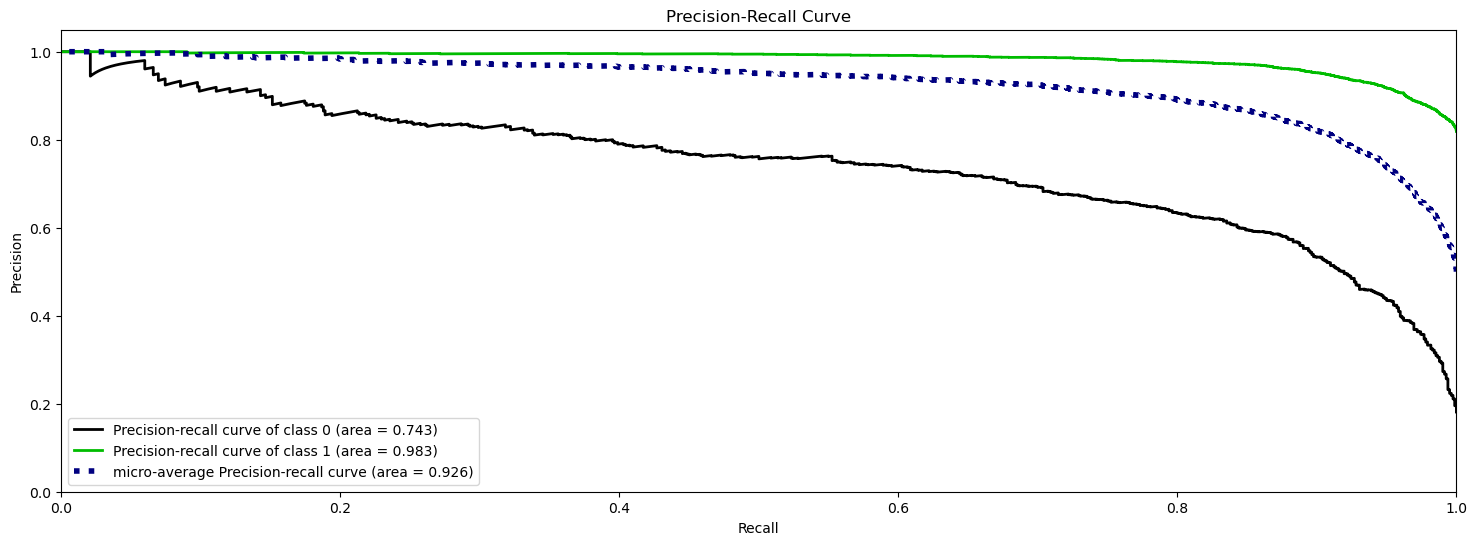

In [111]:
model = LogisticRegression(C=0.4, max_iter=1000, class_weight='balanced')

model.fit(X_train_tf, y_train)

y_pred_proba = model.predict_proba(X_test_tf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [112]:
log_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
log_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
log_tfidf_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

In [113]:
log_tfidf_rec_neg, log_tfidf_f1_neg, log_tfidf_AP_neg

(array([0.80609756]), array([0.66835187]), 0.742911623815962)

## Naive Bayes 

### Countvectorizer

In [118]:
#Creating naive bayes model
nb_cou = MultinomialNB()
nb_cou.fit(X_train_c,y_train)

MultinomialNB()

In [121]:
print("NB MODEL")
eval(nb_cou, X_train_c, X_test_c)
#As we can see, there is no overfitting

NB MODEL
[[ 620  200]
 [ 319 3388]]
Test_Set
              precision    recall  f1-score   support

           0       0.66      0.76      0.70       820
           1       0.94      0.91      0.93      3707

    accuracy                           0.89      4527
   macro avg       0.80      0.84      0.82      4527
weighted avg       0.89      0.89      0.89      4527

Train_Set
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      3280
           1       0.96      0.92      0.94     14827

    accuracy                           0.90     18107
   macro avg       0.83      0.87      0.85     18107
weighted avg       0.91      0.90      0.91     18107



In [126]:
y_pred = nb_cou.predict(X_test_c)
y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [122]:
model = MultinomialNB()
scores = cross_validate(model, X_train_c, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.880709
train_accuracy         0.902456
test_precision-neg     0.647033
train_precision-neg    0.695747
test_recall-neg        0.754268
train_recall-neg       0.820224
test_f1-neg            0.696291
train_f1-neg           0.752870
dtype: float64

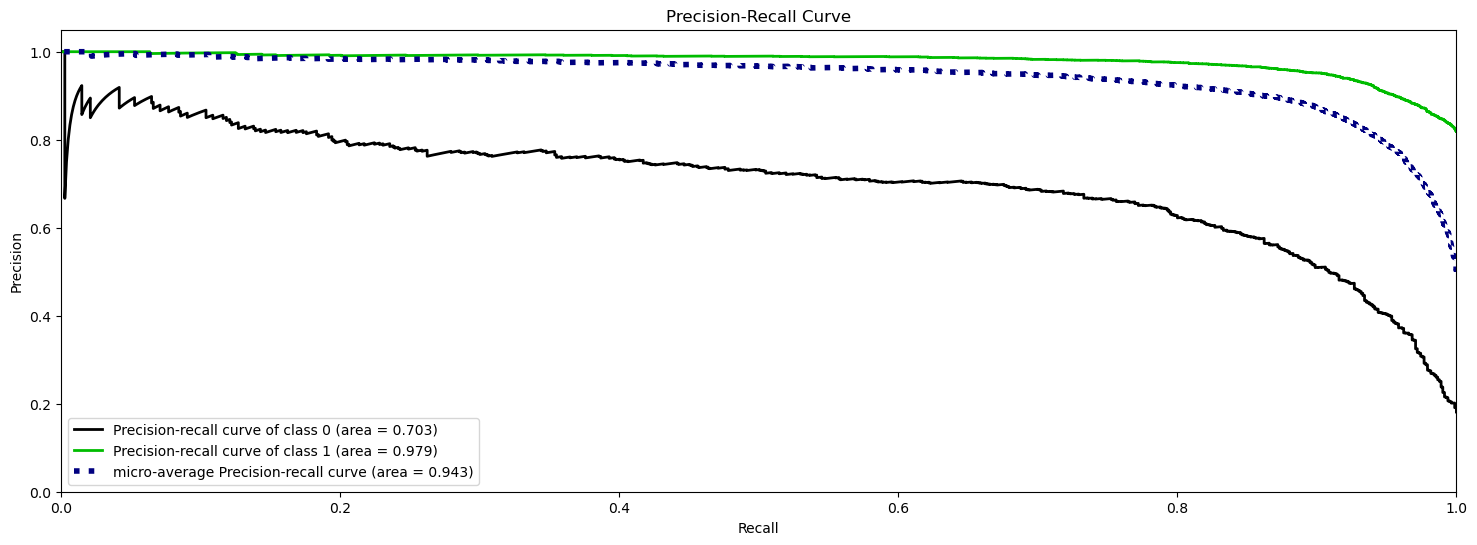

In [123]:
model = MultinomialNB()

model.fit(X_train_c, y_train)

y_pred_proba = model.predict_proba(X_test_c)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [134]:
nb_c_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
nb_c_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
nb_c_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

### TF-IDF

In [128]:
nb_tf = MultinomialNB()
nb_tf.fit(X_train_tf,y_train)

MultinomialNB()

In [129]:
print("NB MODEL")
eval(nb_tf, X_train_tf, X_test_tf)
#As we can see, there is no overfitting, but not balanced

NB MODEL
[[ 139  681]
 [  22 3685]]
Test_Set
              precision    recall  f1-score   support

           0       0.86      0.17      0.28       820
           1       0.84      0.99      0.91      3707

    accuracy                           0.84      4527
   macro avg       0.85      0.58      0.60      4527
weighted avg       0.85      0.84      0.80      4527

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.25      0.40      3280
           1       0.86      1.00      0.92     14827

    accuracy                           0.86     18107
   macro avg       0.90      0.62      0.66     18107
weighted avg       0.87      0.86      0.83     18107



In [130]:
y_pred = nb_tf.predict(X_test_tf)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [131]:
model = MultinomialNB()
scores = cross_validate(model, X_train_tf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.846634
train_accuracy         0.859477
test_precision-neg     0.885457
train_precision-neg    0.945372
test_recall-neg        0.176220
train_recall-neg       0.238008
test_f1-neg            0.293704
train_f1-neg           0.380269
dtype: float64

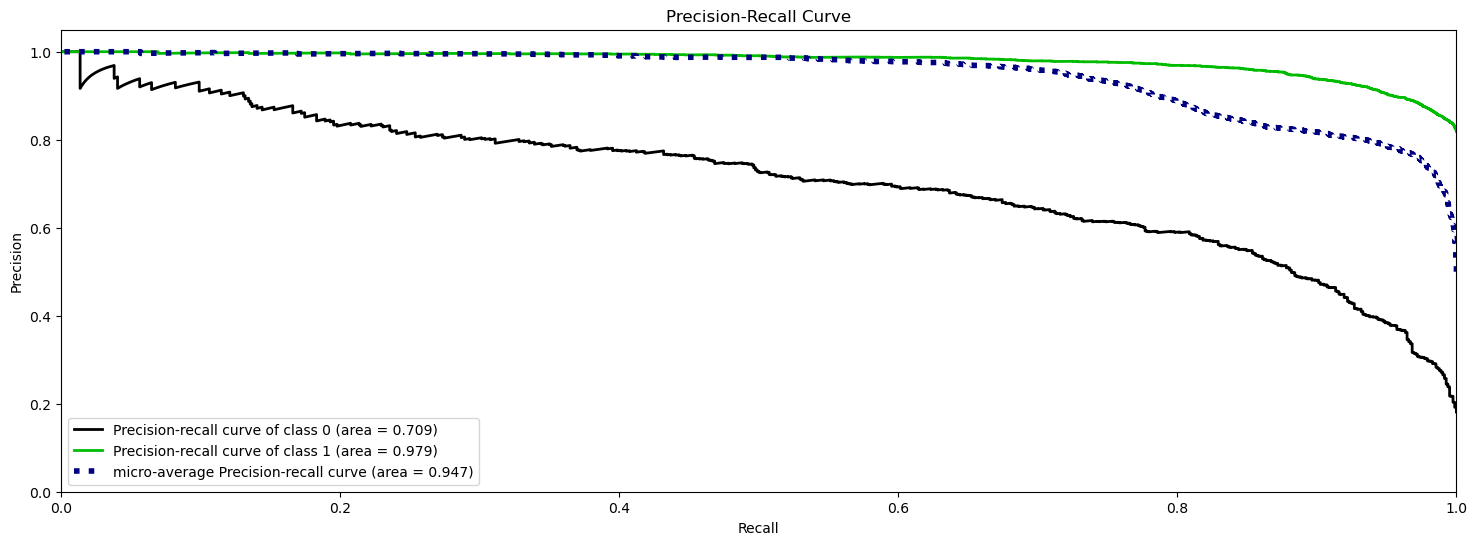

In [132]:
model = MultinomialNB()

model.fit(X_train_tf, y_train)

y_pred_proba = model.predict_proba(X_test_tf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [135]:
nb_tf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
nb_tf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
nb_tf_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

## Support Vector Machine (SVM)

### Countvectorizer

In [140]:
svc_cou = LinearSVC(C=0.01, class_weight='balanced')
svc_cou.fit(X_train_c,y_train)

LinearSVC(C=0.01, class_weight='balanced')

In [141]:
print("SVC Countt MODEL")
eval(svc_cou, X_train_c, X_test_c)

SVC Countt MODEL
[[ 698  122]
 [ 503 3204]]
Test_Set
              precision    recall  f1-score   support

           0       0.58      0.85      0.69       820
           1       0.96      0.86      0.91      3707

    accuracy                           0.86      4527
   macro avg       0.77      0.86      0.80      4527
weighted avg       0.89      0.86      0.87      4527

Train_Set
              precision    recall  f1-score   support

           0       0.65      0.92      0.76      3280
           1       0.98      0.89      0.93     14827

    accuracy                           0.89     18107
   macro avg       0.81      0.90      0.85     18107
weighted avg       0.92      0.89      0.90     18107



In [142]:
y_pred = svc_cou.predict(X_test_c)
y_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [143]:
model = LinearSVC(C=0.1, class_weight='balanced')
scores = cross_validate(model, X_train_c, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.866240
train_accuracy         0.934415
test_precision-neg     0.601477
train_precision-neg    0.745421
test_recall-neg        0.778659
train_recall-neg       0.968869
test_f1-neg            0.678304
train_f1-neg           0.842577
dtype: float64

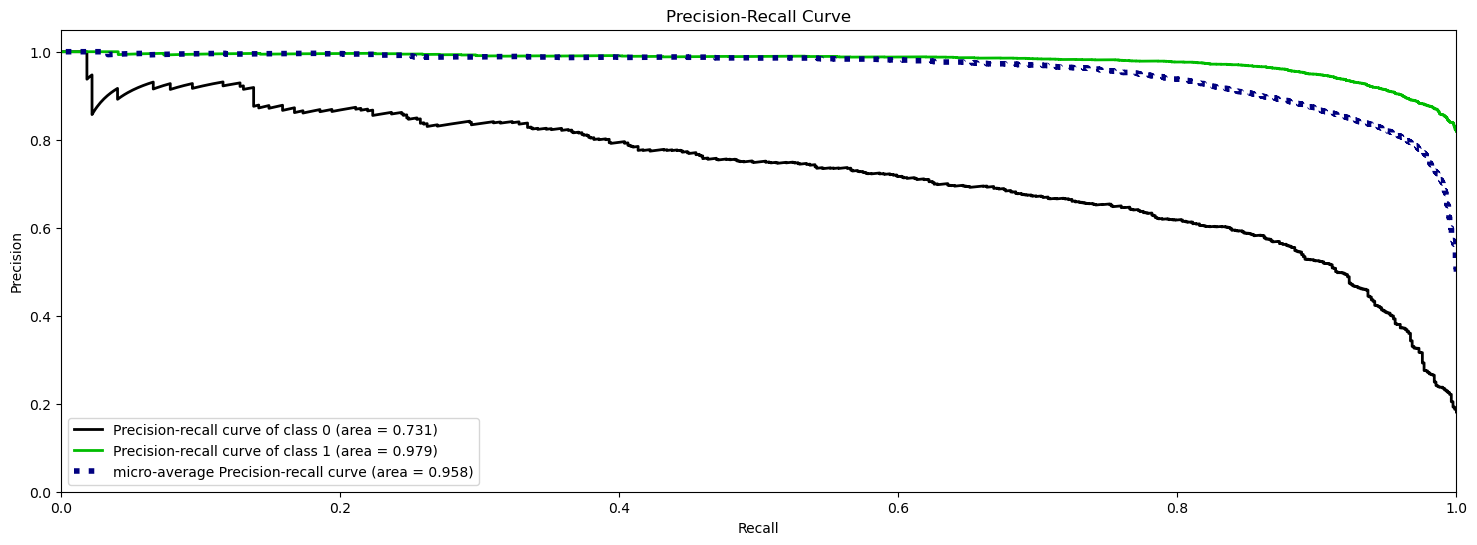

In [167]:
model = LinearSVC(C=0.01, class_weight='balanced')

# Create a CalibratedClassifierCV object
clf = CalibratedClassifierCV(model)

# Fit the CalibratedClassifierCV object to the training data
clf.fit(X_train_c, y_train)

# Get the predicted probabilities for the test data
y_proba = clf.predict_proba(X_test_c)

plot_precision_recall(y_test, y_proba)

plt.show();

In [169]:
svm_c_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
svm_c_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
svm_c_AP_neg = average_precision_score(y_test_dummies[0], y_proba[:, 0])

### TD-IDF

In [170]:
svc_tf = LinearSVC(C=0.1, class_weight='balanced')
svc_tf.fit(X_train_tf,y_train)

LinearSVC(C=0.1, class_weight='balanced')

In [172]:
print("SVC TD MODEL")
eval(svc_tf, X_train_tf, X_test_tf)

SVC TD MODEL
[[ 713  107]
 [ 511 3196]]
Test_Set
              precision    recall  f1-score   support

           0       0.58      0.87      0.70       820
           1       0.97      0.86      0.91      3707

    accuracy                           0.86      4527
   macro avg       0.78      0.87      0.80      4527
weighted avg       0.90      0.86      0.87      4527

Train_Set
              precision    recall  f1-score   support

           0       0.64      0.93      0.76      3280
           1       0.98      0.88      0.93     14827

    accuracy                           0.89     18107
   macro avg       0.81      0.91      0.84     18107
weighted avg       0.92      0.89      0.90     18107



In [173]:
y_pred = svc_tf.predict(X_test_tf)
y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [174]:
model = LinearSVC(C=0.1, class_weight='balanced')
scores = cross_validate(model, X_train_tf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.863755
train_accuracy         0.893246
test_precision-neg     0.586052
train_precision-neg    0.641145
test_recall-neg        0.849695
train_recall-neg       0.932757
test_f1-neg            0.693345
train_f1-neg           0.759935
dtype: float64

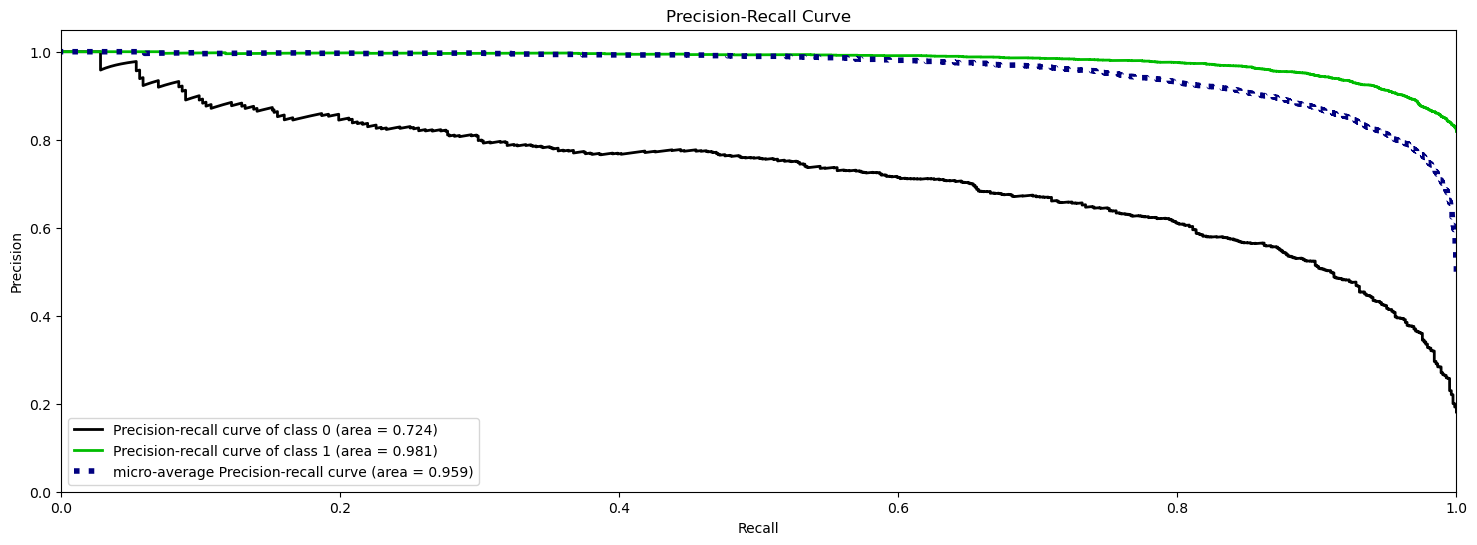

In [176]:
model = LinearSVC(C=0.01, class_weight='balanced')

# Create a CalibratedClassifierCV object
clf = CalibratedClassifierCV(model)

# Fit the CalibratedClassifierCV object to the training data
clf.fit(X_train_tf, y_train)

# Get the predicted probabilities for the test data
y_proba = clf.predict_proba(X_test_tf)

plot_precision_recall(y_test, y_proba)

plt.show();

In [177]:
svm_tf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
svm_tf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
svm_tf_AP_neg = average_precision_score(y_test_dummies[0], y_proba[:, 0])

## Random Forest

### Countvectorizer

In [186]:
rf_cou = RandomForestClassifier(100, max_depth=10, random_state = s, n_jobs = -1, class_weight='balanced') 
rf_cou.fit(X_train_c, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=101)

In [187]:
print("RF count MODEL")
eval(rf_cou, X_train_c, X_test_c)

RF count MODEL
[[ 667  153]
 [ 566 3141]]
Test_Set
              precision    recall  f1-score   support

           0       0.54      0.81      0.65       820
           1       0.95      0.85      0.90      3707

    accuracy                           0.84      4527
   macro avg       0.75      0.83      0.77      4527
weighted avg       0.88      0.84      0.85      4527

Train_Set
              precision    recall  f1-score   support

           0       0.59      0.89      0.71      3280
           1       0.97      0.87      0.92     14827

    accuracy                           0.87     18107
   macro avg       0.78      0.88      0.81     18107
weighted avg       0.90      0.87      0.88     18107



In [189]:
y_pred = rf_cou.predict(X_test_c)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [195]:
model = RandomForestClassifier(100, max_depth = 10, random_state = s, n_jobs = -1, class_weight='balanced')
scores = cross_validate(model, X_train_c, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.841498
train_accuracy         0.872529
test_precision-neg     0.542584
train_precision-neg    0.600849
test_recall-neg        0.799390
train_recall-neg       0.884587
test_f1-neg            0.646197
train_f1-neg           0.715512
dtype: float64

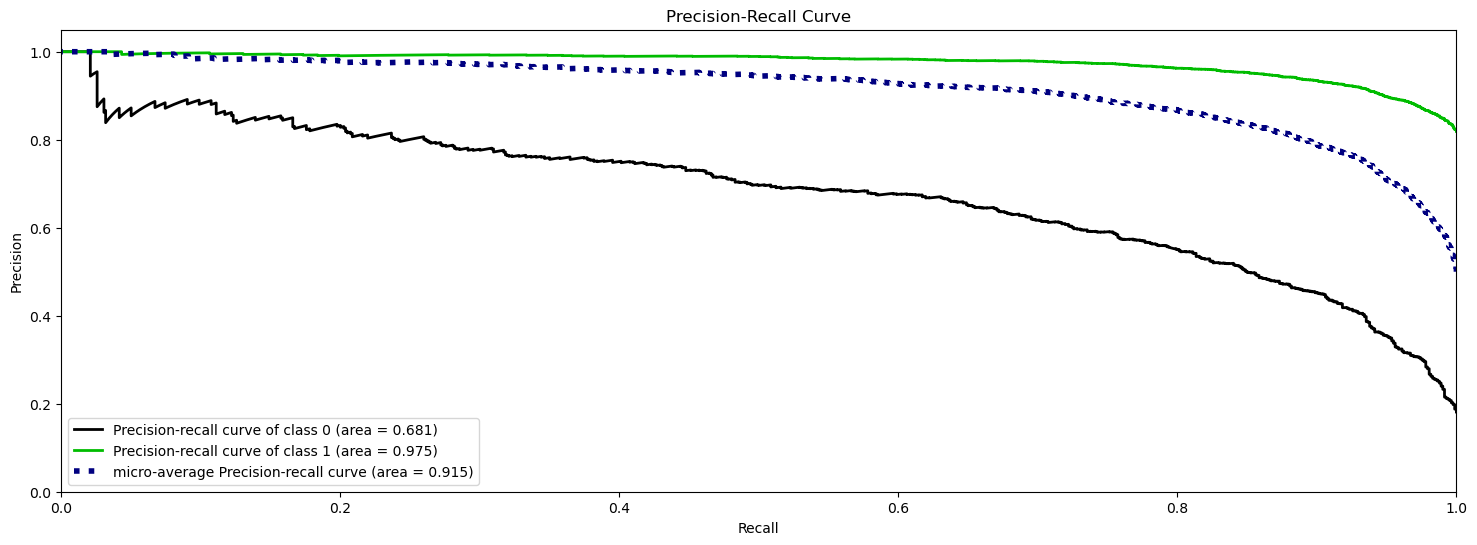

In [196]:
model = RandomForestClassifier(100, max_depth = 10, random_state = s, n_jobs = -1, class_weight='balanced')

model.fit(X_train_c, y_train)

y_pred_proba = model.predict_proba(X_test_c)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [197]:
rf_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
rf_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
rf_count_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

### TF-IDF

In [198]:
rf_tf = RandomForestClassifier(100, max_depth=10, random_state = s, n_jobs = -1, class_weight='balanced') 
rf_tf.fit(X_train_tf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=101)

In [199]:
print("RF tf MODEL")
eval(rf_tf, X_train_tf, X_test_tf)

RF tg MODEL
[[ 660  160]
 [ 591 3116]]
Test_Set
              precision    recall  f1-score   support

           0       0.53      0.80      0.64       820
           1       0.95      0.84      0.89      3707

    accuracy                           0.83      4527
   macro avg       0.74      0.82      0.76      4527
weighted avg       0.87      0.83      0.85      4527

Train_Set
              precision    recall  f1-score   support

           0       0.59      0.91      0.71      3280
           1       0.98      0.86      0.91     14827

    accuracy                           0.87     18107
   macro avg       0.78      0.88      0.81     18107
weighted avg       0.91      0.87      0.88     18107



In [201]:
y_pred = rf_tf.predict(X_test_tf)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [210]:
model = RandomForestClassifier(100, max_depth=10, random_state = s, n_jobs = -1, class_weight='balanced') 
scores = cross_validate(model, X_train_tf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.832938
train_accuracy         0.872523
test_precision-neg     0.526558
train_precision-neg    0.598367
test_recall-neg        0.787500
train_recall-neg       0.902236
test_f1-neg            0.630891
train_f1-neg           0.719481
dtype: float64

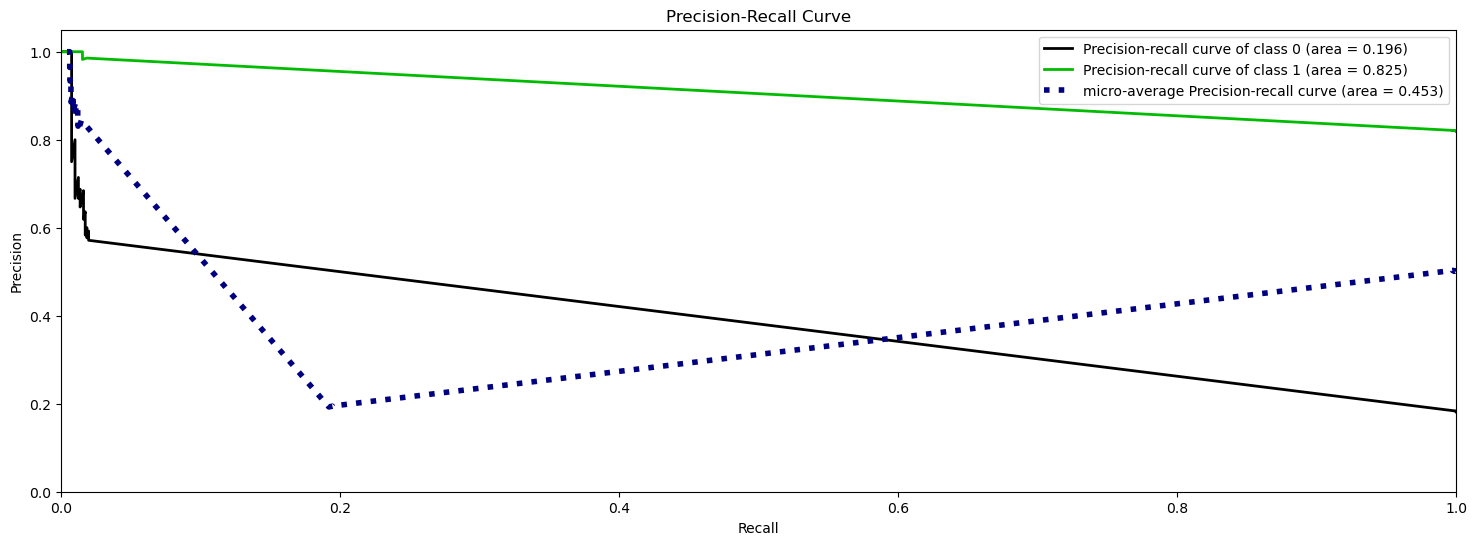

In [207]:
model = RandomForestClassifier(100, max_depth=10, random_state = s, n_jobs = -1, class_weight='balanced') 

model.fit(X_train_c, y_train)

y_pred_proba = model.predict_proba(X_test_tf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [206]:
rf_tf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
rf_tf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
rf_tf_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

## Ada Boosting

### Countvectorizer

In [216]:
ada_cou = AdaBoostClassifier(n_estimators= 200, random_state = s)
ada_cou.fit(X_train_c, y_train)

AdaBoostClassifier(n_estimators=500, random_state=101)

In [217]:
print("Ada count MODEL")
eval(ada_cou, X_train_c, X_test_c)

Ada count MODEL
[[ 473  347]
 [ 210 3497]]
Test_Set
              precision    recall  f1-score   support

           0       0.69      0.58      0.63       820
           1       0.91      0.94      0.93      3707

    accuracy                           0.88      4527
   macro avg       0.80      0.76      0.78      4527
weighted avg       0.87      0.88      0.87      4527

Train_Set
              precision    recall  f1-score   support

           0       0.80      0.66      0.72      3280
           1       0.93      0.96      0.95     14827

    accuracy                           0.91     18107
   macro avg       0.87      0.81      0.83     18107
weighted avg       0.90      0.91      0.91     18107



In [218]:
y_pred = ada_cou.predict(X_test_c)

In [220]:
model = AdaBoostClassifier(n_estimators= 500, random_state = s)
scores = cross_validate(model, X_train_c, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.879549
train_accuracy         0.911201
test_precision-neg     0.702074
train_precision-neg    0.807160
test_recall-neg        0.583537
train_recall-neg       0.669817
test_f1-neg            0.636971
train_f1-neg           0.732092
dtype: float64

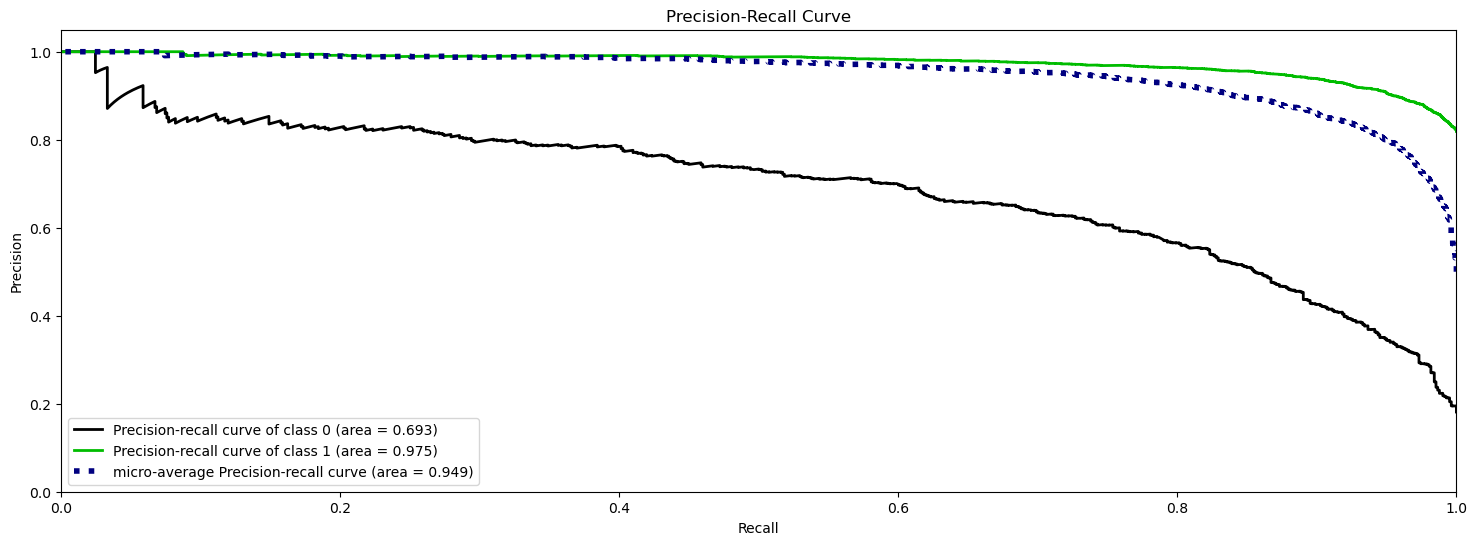

In [234]:
model = AdaBoostClassifier(n_estimators= 200, random_state = s)

model.fit(X_train_c, y_train)

y_pred_proba = model.predict_proba(X_test_c)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [222]:
ada_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
ada_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
ada_count_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

### TF-IDF

In [229]:
ada_tf = AdaBoostClassifier(n_estimators= 200, random_state = s)
ada_tf.fit(X_train_tf, y_train)

AdaBoostClassifier(n_estimators=200, random_state=101)

In [230]:
print("Ada tf MODEL")
eval(ada_tf, X_train_tf, X_test_tf)

Ada tf MODEL
[[ 457  363]
 [ 197 3510]]
Test_Set
              precision    recall  f1-score   support

           0       0.70      0.56      0.62       820
           1       0.91      0.95      0.93      3707

    accuracy                           0.88      4527
   macro avg       0.80      0.75      0.77      4527
weighted avg       0.87      0.88      0.87      4527

Train_Set
              precision    recall  f1-score   support

           0       0.76      0.61      0.68      3280
           1       0.92      0.96      0.94     14827

    accuracy                           0.90     18107
   macro avg       0.84      0.78      0.81     18107
weighted avg       0.89      0.90      0.89     18107



In [231]:
y_pred = ada_tf.predict(X_test_tf)

In [226]:
model = AdaBoostClassifier(n_estimators= 200, random_state = s)
scores = cross_validate(model, X_train_tf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.876457
train_accuracy         0.924234
test_precision-neg     0.691161
train_precision-neg    0.834652
test_recall-neg        0.575915
train_recall-neg       0.725508
test_f1-neg            0.627923
train_f1-neg           0.776249
dtype: float64

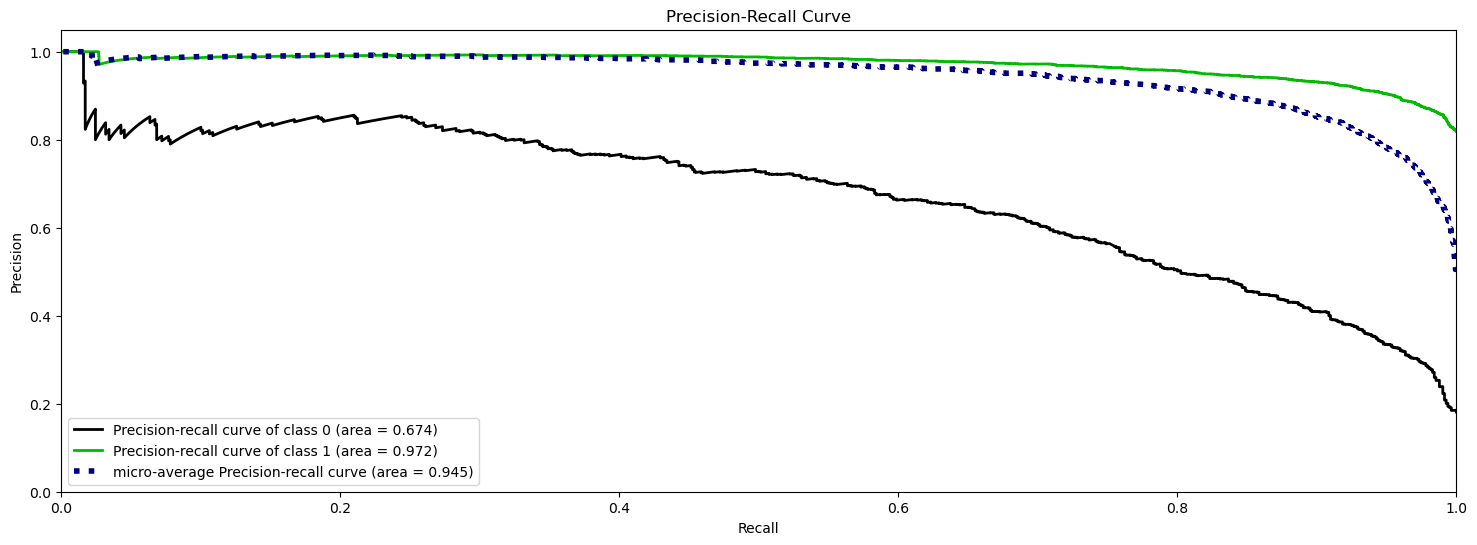

In [233]:
model = AdaBoostClassifier(n_estimators= 200, random_state = s)

model.fit(X_train_tf, y_train)

y_pred_proba = model.predict_proba(X_test_tf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [228]:
ada_tf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
ada_tf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
ada_tf_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

## DL modeling

### Tokenization

In [237]:
num_words = 10001 

tokenizer = Tokenizer(num_words=num_words)

In [238]:
tokenizer.fit_on_texts(X)

### Creating word index

In [239]:
tokenizer.word_index

{'dress': 1,
 'fit': 2,
 'not': 3,
 'size': 4,
 'love': 5,
 'top': 6,
 'like': 7,
 'color': 8,
 'look': 9,
 'wear': 10,
 'great': 11,
 'would': 12,
 'fabric': 13,
 'small': 14,
 'really': 15,
 'ordered': 16,
 'little': 17,
 'perfect': 18,
 'one': 19,
 'flattering': 20,
 'soft': 21,
 'well': 22,
 'back': 23,
 'comfortable': 24,
 'cute': 25,
 'nice': 26,
 'bought': 27,
 'beautiful': 28,
 'bit': 29,
 'material': 30,
 'large': 31,
 'shirt': 32,
 'much': 33,
 'sweater': 34,
 'length': 35,
 'run': 36,
 'jean': 37,
 'also': 38,
 'work': 39,
 'petite': 40,
 'got': 41,
 'long': 42,
 'could': 43,
 'short': 44,
 'waist': 45,
 'quality': 46,
 'medium': 47,
 'skirt': 48,
 'think': 49,
 'pretty': 50,
 'even': 51,
 'retailer': 52,
 'x': 53,
 'make': 54,
 'feel': 55,
 'tried': 56,
 'pant': 57,
 'store': 58,
 'usually': 59,
 'get': 60,
 'way': 61,
 'sleeve': 62,
 'good': 63,
 'big': 64,
 'made': 65,
 'cut': 66,
 'go': 67,
 'still': 68,
 'style': 69,
 'right': 70,
 'black': 71,
 'super': 72,
 'true': 73

In [240]:
len(tokenizer.word_index)

11910

### Converting tokens to numeric

In [241]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [242]:
X[:2]

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store gla...
Name: review, dtype: object

In [243]:
X_num_tokens[:2]

[[170, 394, 718, 500, 24],
 [5,
  1,
  1371,
  50,
  1047,
  148,
  58,
  216,
  976,
  309,
  12,
  16,
  75,
  976,
  40,
  27,
  40,
  5,
  35,
  159,
  17,
  203,
  12,
  91,
  73,
  1114,
  316,
  585,
  40]]

### Maximum number of tokens for all documents¶

In [244]:
len(X_num_tokens[105])

30

In [245]:
len(X_num_tokens[106])

6

In [246]:
len(X_num_tokens[5999])

44

In [247]:
num_tokens = [len(sen_tokens) for sen_tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [248]:
num_tokens

array([ 5, 29, 48, ..., 17, 38, 10])

In [249]:
num_tokens.mean()

28.04387205089688

In [250]:
num_tokens.max()

59

In [251]:
list = [5, 10, 8, 9, 12, 15]
print(np.array(list) <= 11)
print(sum(np.array(list) <= 11))
print(sum(np.array(list) <= 11)/len(list))

[ True  True  True  True False False]
4
0.6666666666666666


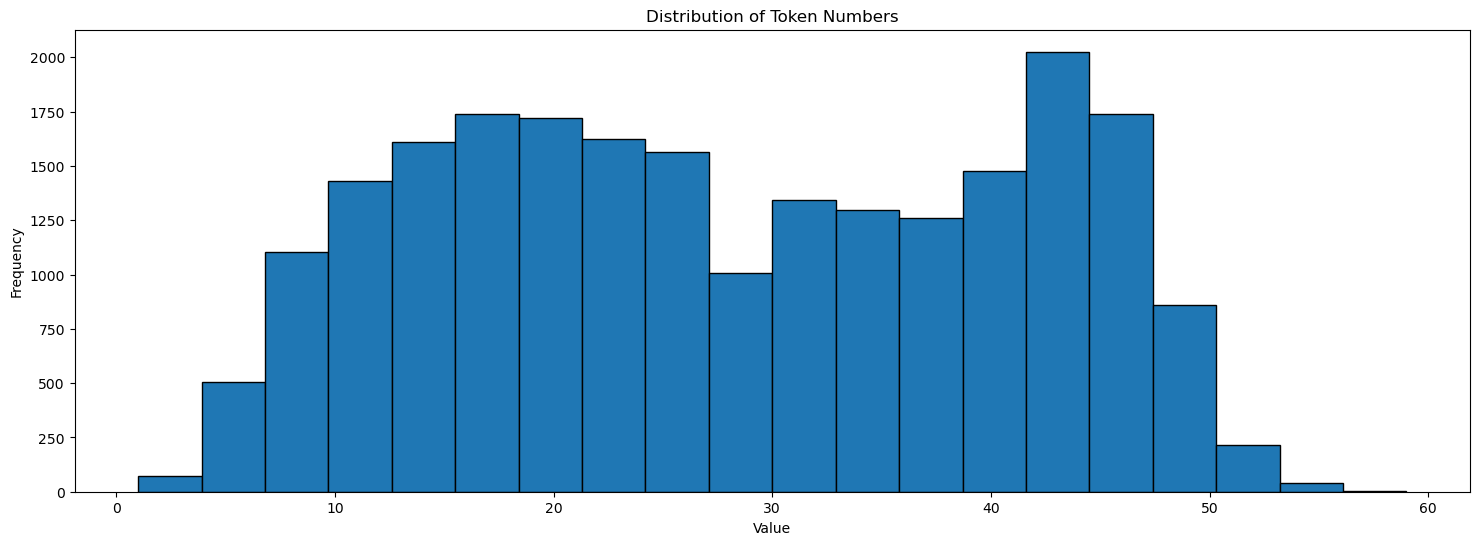

In [252]:
# Plot a histogram to visualize the distribution
plt.hist(num_tokens, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title("Distribution of Token Numbers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [253]:
max_tokens = 21

In [254]:
sum(num_tokens <= max_tokens) / len(num_tokens)

0.3615357426879915

In [255]:
sum(num_tokens <= max_tokens)

8183

In [256]:
len(num_tokens)

22634

### Fixing token counts of all documents (pad_sequences)

In [257]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre")

NameError: name 'pad_sequences' is not defined

In [ ]:
X_pad.shape

In [ ]:
X_num_tokens[801]

In [ ]:
len(X_num_tokens[801])

In [ ]:
X_pad[801]

In [ ]:
np.argmax(num_tokens)

In [ ]:
np.array(X_num_tokens[7185])

In [ ]:
X_pad[7185]

In [ ]:
unique_labels = df[''].unique()
unique_labels

In [ ]:
label_dict = dict()

for i, label in enumerate(unique_labels):
    label_dict[label] = i

label_dict

In [ ]:
df2.head()

### Train Set Split

### Modeling

### Model Evaluation

## BERT Modeling

### Read Data

### Train test split

### Tokenization

### Fixing token counts of all documents

### Transformation Vectors to Matrices

### Transformation Matrix to Tensorflow tensor

### Batch Size

### Creating optimization

### Creating Model with TPU

### Model Fiting

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "KNN_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", "KNN_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "LogReg_allan"],

                        "F1_Score_Negative": [nb_count_f1_neg[0], log_count_f1_neg[0], svc_count_f1_neg[0], knn_count_f1_neg[0],
                                             rf_count_f1_neg[0], ada_count_f1_neg[0], nb_tfidf_f1_neg[0], log_tfidf_f1_neg[0],
                                             svc_tfidf_f1_neg[0], knn_tfidf_f1_neg[0], rf_tfidf_f1_neg[0], ada_tfidf_f1_neg[0], lr_allan_f1_neg[0]],

                        "Recall_Score_Negative": [nb_count_rec_neg[0], log_count_rec_neg[0], svc_count_rec_neg[0],
                                                  knn_count_rec_neg[0], rf_count_rec_neg[0], ada_count_rec_neg[0],
                                                  nb_tfidf_rec_neg[0], log_tfidf_rec_neg[0], svc_tfidf_rec_neg[0],
                                                  knn_tfidf_rec_neg[0], rf_tfidf_rec_neg[0], ada_tfidf_rec_neg[0], lr_allan_rec_neg[0]],

                        "Average_Precision_Score_Negative": [nb_AP_neg, log_AP_neg, svc_AP_neg, knn_AP_neg, rf_AP_neg,
                                                          ada_AP_neg, nb_tfidf_AP_neg, log_tfidf_AP_neg, svc_tfidf_AP_neg,
                                                           knn_tfidf_AP_neg, rf_tfidf_AP_neg, ada_tfidf_AP_neg, lr_allan_AP_neg]})

compare

In [ ]:
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score_Negative", ascending=False)
ax=sns.barplot(x="Average_Precision_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

# Although the RF and NB models have higher recall scores, their F1 scores are lower, indicating that the precision scores of these models are relatively
# lower than those of logistic regression or SVM.

# For us, having a high recall alone is not important. It is necessary for both recall and precision to be as high as possible. Therefore,
# we will continue with logrec tf-idf

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___